## Where is the highest density of programmers per population and GDP?

At previous stages of analysis we were able to identify most popular, and important programming hubs within Europe. We have answered a sequence of questions in terms of where and how technology affect the regions and which areas are more or less technology advanced. 

On the next step we will dig deeper into how region in Europe are advanced in terms of programming, and how population that lives there are adjusting to the technology revolution over the past few years (2008-2020). To understand those changes and adaptiveness of the society we will investigate what is the density of the programmers per population and how those translates to the Gross Domestic Products of analyzed regions. 

To answer this question, we need to establish criteria that define what constitutes a "programmers". Our database extracted from Stack Overflow contains the information about users' activity within those regions throughout the years, however each programmer is interacting with Stack Overflow more than once in their professional activity / lifetime, therefore this must be considered, while establishing the amount of programmers. 

As said, our database consists data about user activity: number of questions asked, number of answers submitted, numbers of positive and negative interaction with a post and number of comments. All information are aggregated by year and by region (NUTS3). Based on those interactions with platform, it must be defined how ordinary programmers behaves, how often she/he interacts with platform, and in what way, in order to establish a definition of "programmer". 

Here are some considerations and steps to approach this:

1. We supported ourselves with the data from research conducted by Stack Overflow among their users - **Stack Overflow Developers Survey 2021.** This dataset contains information about developers / programmers habits: how often they interact with platform, what is their profession, how frequently they visit the platform. This dataset will serve as basis to define definition of programmer based on their Stack OVerflow activity. 

In [1]:
!pip install kmodes

from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import warnings
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

In [2]:
survey_data = pd.read_csv('survey_results_public.csv')
survey_data.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
survey_data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [4]:
columns_to_drop = ["US_State", "UK_Country", "Age1stCode", "LearnCode", "YearsCode", "Gender", "Trans", "Sexuality", 
                  "Ethnicity", "Accessibility", "MentalHealth", 'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
                    'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith','DatabaseHaveWorkedWith', 
                    'DatabaseWantToWorkWith','PlatformHaveWorkedWith', 'PlatformWantToWorkWith','WebframeHaveWorkedWith', 
                    'WebframeWantToWorkWith','MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith','ToolsTechHaveWorkedWith', 
                    'ToolsTechWantToWorkWith','NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
                    "SurveyLength", "SurveyEase", "ConvertedCompYearly"]
survey_data = survey_data.drop(columns = columns_to_drop)
survey_data = survey_data[survey_data['SOPartFreq'].notna()]

In [5]:
survey_data.head(5)

,ResponseId,MainBranch,Employment,Country,EdLevel,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old
3,4,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Visit Stack Overflow;Go for a walk or other ph...,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per week,"Yes, somewhat",No,25-34 years old


2. From Stack Overflow Developer Survey Dataset, for this research we are interested in defining habits. Therefore, in the next steps we will try to analyze the correlations and similarities between submitted answers. 

In [6]:
survey_data.MainBranch.value_counts()

I am a developer by profession                                                   48711
I am a student who is learning to code                                            8774
I am not primarily a developer, but I write code sometimes as part of my work     5189
I code primarily as a hobby                                                       3649
I used to be a developer by profession, but no longer am                           964
None of these                                                                      266
Name: MainBranch, dtype: int64

In [7]:
survey_data.SOPartFreq.value_counts()

Less than once per month or monthly                   30778
I have never participated in Q&A on Stack Overflow    14243
A few times per month or weekly                       12978
A few times per week                                   5687
Daily or almost daily                                  2613
Multiple times per day                                 1254
Name: SOPartFreq, dtype: int64

In [8]:
# Count the occurrences of each combination
combination_counts = survey_data.groupby(['MainBranch', 'SOPartFreq']).size().reset_index(name='Count')

# Display the result
combination_counts = survey_data.groupby(['MainBranch', 'SOPartFreq']).size().reset_index(name='Count')

# Sort the values in ascending order
combination_counts = combination_counts.sort_values(by=['MainBranch', 'SOPartFreq'], ascending= True)

# Calculate the ratio for each category
combination_counts['Ratio'] = combination_counts['Count'] / combination_counts['Count'].sum()

combination_counts

,MainBranch,SOPartFreq,Count,Ratio
0,I am a developer by profession,A few times per month or weekly,9673,0.143191
1,I am a developer by profession,A few times per week,4238,0.062736
2,I am a developer by profession,Daily or almost daily,2042,0.030228
3,I am a developer by profession,I have never participated in Q&A on Stack Over...,8692,0.128669
4,I am a developer by profession,Less than once per month or monthly,23095,0.341880
5,I am a developer by profession,Multiple times per day,971,0.014374
6,I am a student who is learning to code,A few times per month or weekly,1388,0.020547
7,I am a student who is learning to code,A few times per week,646,0.009563
8,I am a student who is learning to code,Daily or almost daily,224,0.003316
9,I am a student who is learning to code,I have never participated in Q&A on Stack Over...,3214,0.047577


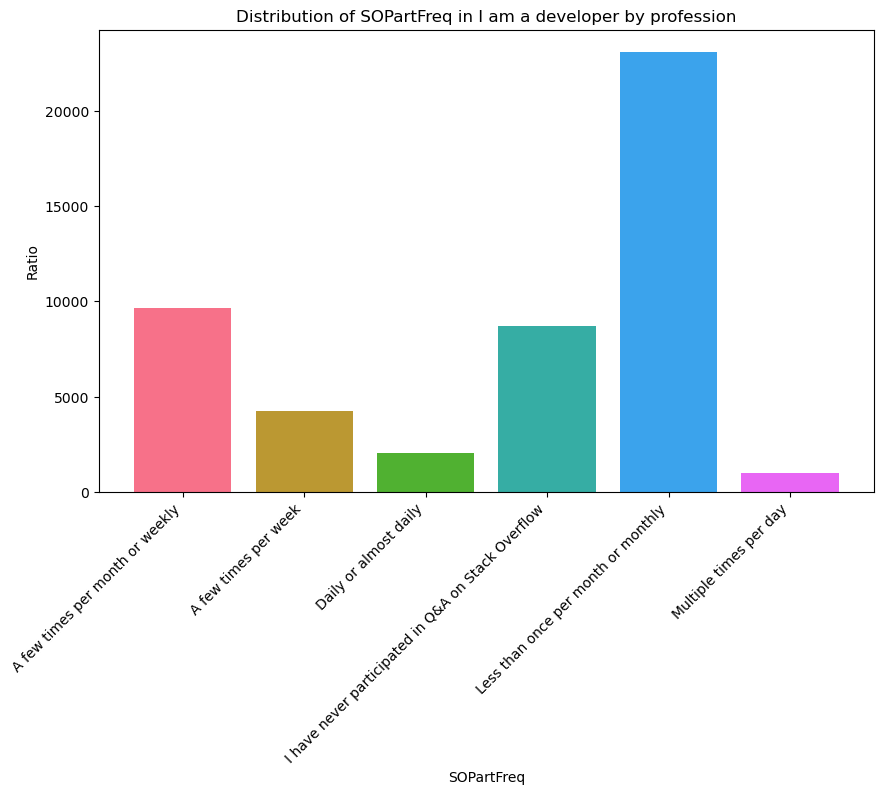

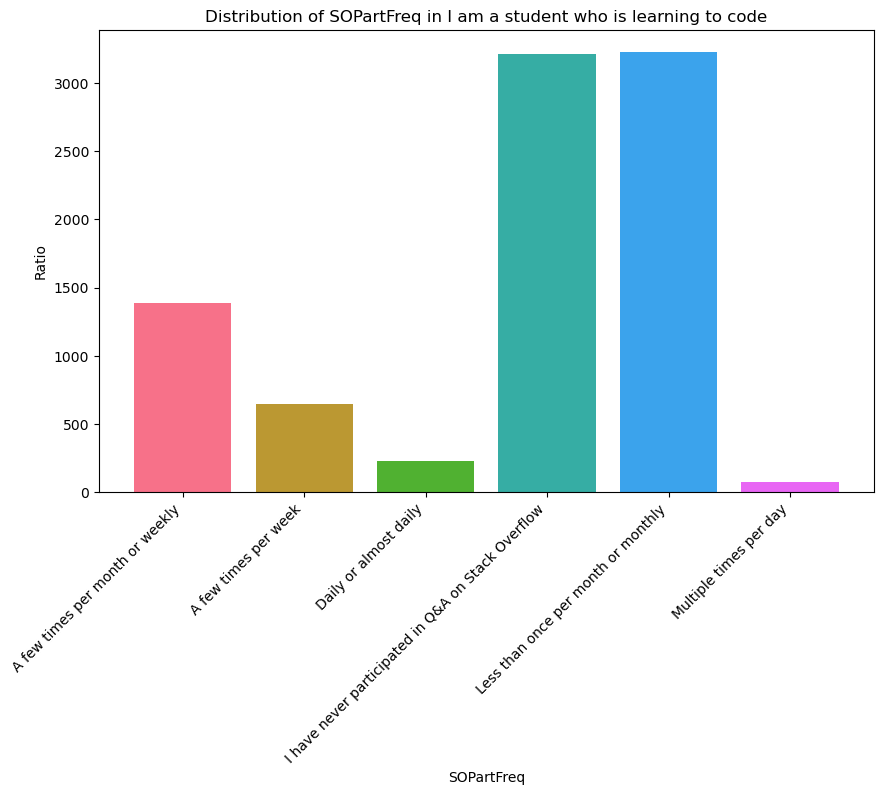

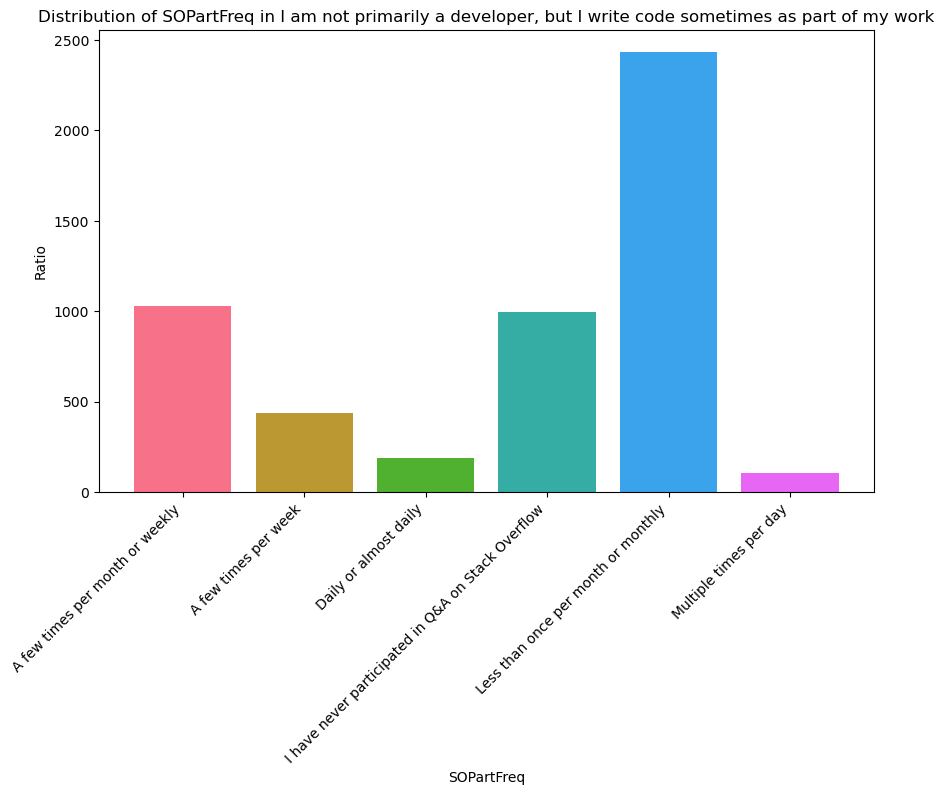

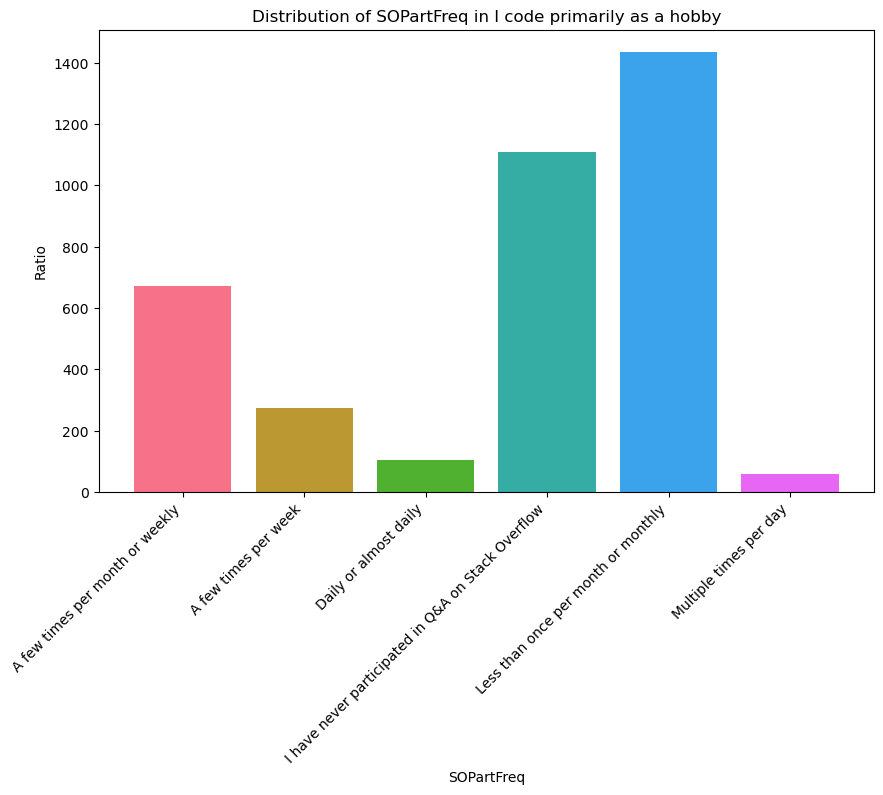

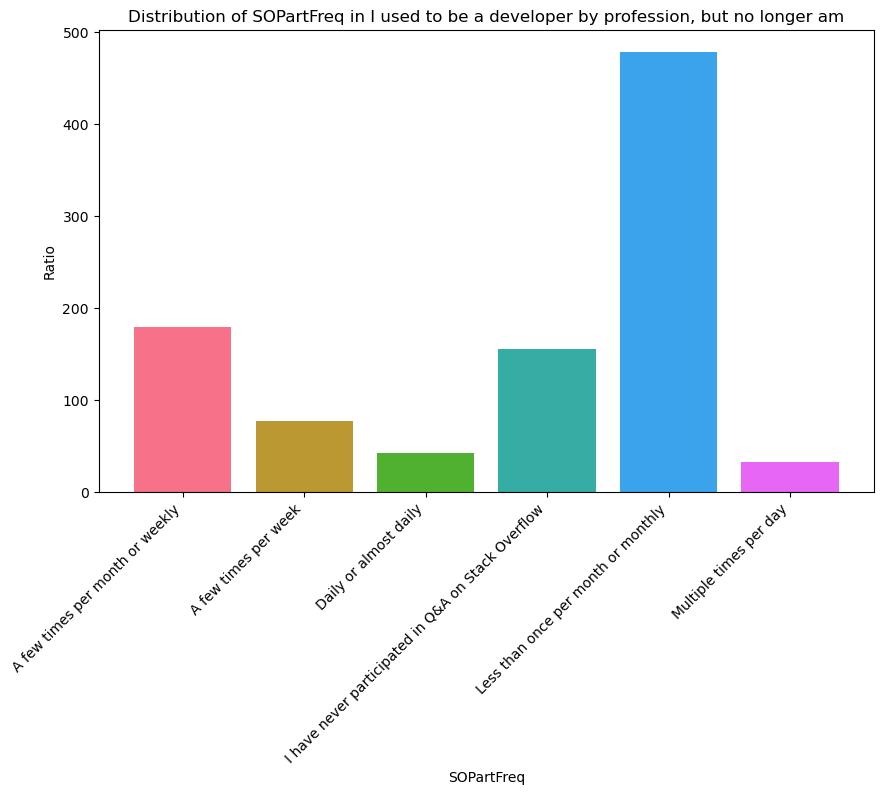

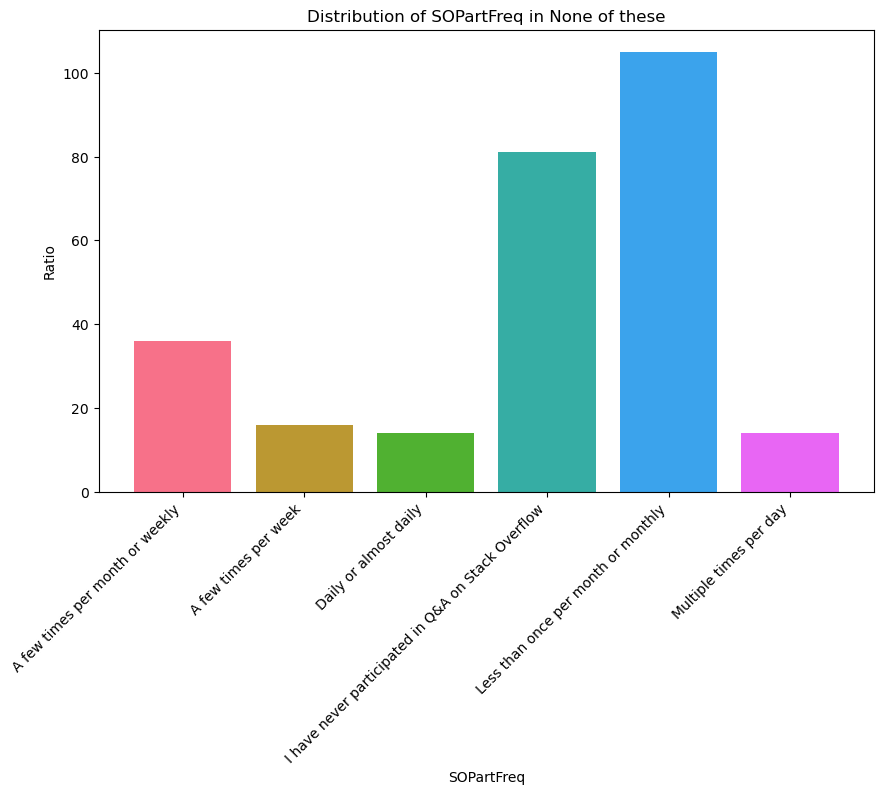

In [9]:
# Visualize the results with different colors for each bar
categories = combination_counts['MainBranch'].unique()
colors = sns.color_palette("husl", n_colors=len(combination_counts['SOPartFreq'].unique()))

for category in categories:
    category_data = combination_counts[combination_counts['MainBranch'] == category]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(category_data['SOPartFreq'], category_data['Count'], color=colors)
    plt.title(f'Distribution of SOPartFreq in {category}')
    plt.xlabel('SOPartFreq')
    plt.ylabel('Ratio')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

    plt.show()

In [10]:
most_popular_combinations = combination_counts.sort_values(by='Ratio', ascending=False)
most_popular_combinations.head(10)

,MainBranch,SOPartFreq,Count,Ratio
4,I am a developer by profession,Less than once per month or monthly,23095,0.341880
0,I am a developer by profession,A few times per month or weekly,9673,0.143191
3,I am a developer by profession,I have never participated in Q&A on Stack Over...,8692,0.128669
1,I am a developer by profession,A few times per week,4238,0.062736
10,I am a student who is learning to code,Less than once per month or monthly,3230,0.047814
9,I am a student who is learning to code,I have never participated in Q&A on Stack Over...,3214,0.047577
16,"I am not primarily a developer, but I write co...",Less than once per month or monthly,2435,0.036046
2,I am a developer by profession,Daily or almost daily,2042,0.030228
22,I code primarily as a hobby,Less than once per month or monthly,1435,0.021243
6,I am a student who is learning to code,A few times per month or weekly,1388,0.020547



Clustering is a technique used in data analysis and machine learning to group similar data points together based on certain characteristics or features. The primary goal of clustering is to discover inherent patterns or structures within the data, making it easier to understand and interpret complex datasets.

Clustering can be particularly useful in scenarios where there is no predefined label for the data, and the objective is to uncover natural groupings or categories. In the context of your analysis, you are using clustering to define specific personas or sets of characteristics within your dataset.

There are different clustering algorithms, and two common ones are K-means clustering and K-modes clustering. Let's discuss the differences and why K-modes clustering might be more suitable for your analysis:

K-means Clustering:

Data Type Requirement: K-means is designed for numerical data. It calculates the mean of data points within clusters and relies on the concept of centroid, which is the average position of all the points in a cluster.
Calculation Method: It uses Euclidean distance to measure dissimilarity between data points, which is sensitive to the scale and magnitude of numerical features.
K-modes Clustering:

Data Type Requirement: K-modes is designed for categorical data. It works with modes (most frequent values) instead of means.
Calculation Method: It employs a dissimilarity measure specifically tailored for categorical data, which considers the number of matching categories between data points.
Why K-modes Clustering for Categorical Data:

Interpretability: Categorical data often represents qualitative attributes, and finding modes (most frequent values) is more interpretable than calculating means.
Handling Missing Data: K-modes is more robust when dealing with missing categorical values compared to K-means.
Nominal Data: K-modes is suitable for nominal data, where the order of categories doesn't matter, unlike K-means which assumes ordinality.
In your analysis, where you are dealing with categorical data such as 'MainBranch' and 'SOPartFreq', K-modes clustering is a more appropriate choice. It allows you to group similar respondents based on categorical features, providing insights into patterns or personas that may exist within your dataset. The elbow test helps determine the optimal number of clusters for your specific data, enhancing the quality and relevance of the insights gained from the analysis.

In [11]:
survey_data = survey_data.reset_index()

In [12]:
most_popular_combinations.shape

(36, 4)

In [13]:
person = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16',
         'P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30','P31','P32',
         'P33', 'P34','P35','P36']
most_popular_combinations["person"] = person
data_cluster = most_popular_combinations.set_index('person')
data_cluster

,MainBranch,SOPartFreq,Count,Ratio
person,,,,
P1,I am a developer by profession,Less than once per month or monthly,23095,0.341880
P2,I am a developer by profession,A few times per month or weekly,9673,0.143191
P3,I am a developer by profession,I have never participated in Q&A on Stack Over...,8692,0.128669
P4,I am a developer by profession,A few times per week,4238,0.062736
P5,I am a student who is learning to code,Less than once per month or monthly,3230,0.047814
P6,I am a student who is learning to code,I have never participated in Q&A on Stack Over...,3214,0.047577
P7,"I am not primarily a developer, but I write co...",Less than once per month or monthly,2435,0.036046
P8,I am a developer by profession,Daily or almost daily,2042,0.030228
P9,I code primarily as a hobby,Less than once per month or monthly,1435,0.021243


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 128.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 120.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 118.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, it

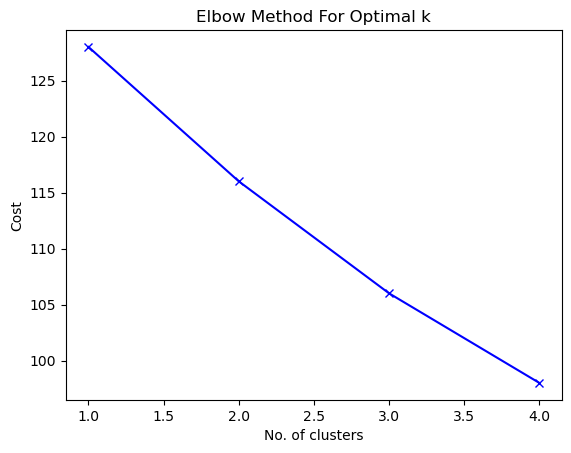

In [14]:
data_cluster_copy = data_cluster.copy()

# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_cluster_copy)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow method is used to choose an appropiate number of clusters, which visually would be at the point where the curve begins to decrease more slowly, which would be around 3 clusters. After this point, the curve starts decreasing at a much lower rate, meaning that using more clusters doesnt neccesarily provide any significantly better fitting of the data.

In [15]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data_cluster_copy)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 106.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 106.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4, cost: 108.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 108.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 108.0
Best run was number 1


array([2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0], dtype=uint16)

In [16]:
data_cluster["Cluster"] = clusters

In [17]:
grouped_df = pd.DataFrame(columns=data_cluster.columns)
grouped = data_cluster.groupby("Cluster")

# Iterate over the groups and append each group to the new DataFrame
for name, group in grouped:
    grouped_df = pd.concat([grouped_df, group])

grouped_df.sort_values(by=['Cluster', 'MainBranch'])

,MainBranch,SOPartFreq,Count,Ratio,Cluster
P2,I am a developer by profession,A few times per month or weekly,9673,0.143191,0
P4,I am a developer by profession,A few times per week,4238,0.062736,0
P8,I am a developer by profession,Daily or almost daily,2042,0.030228,0
P14,I am a developer by profession,Multiple times per day,971,0.014374,0
P10,I am a student who is learning to code,A few times per month or weekly,1388,0.020547,0
P16,I am a student who is learning to code,A few times per week,646,0.009563,0
P20,I am a student who is learning to code,Daily or almost daily,224,0.003316,0
P29,I am a student who is learning to code,Multiple times per day,72,0.001066,0
P21,"I am not primarily a developer, but I write co...",Daily or almost daily,187,0.002768,0
P15,I code primarily as a hobby,A few times per month or weekly,671,0.009933,0


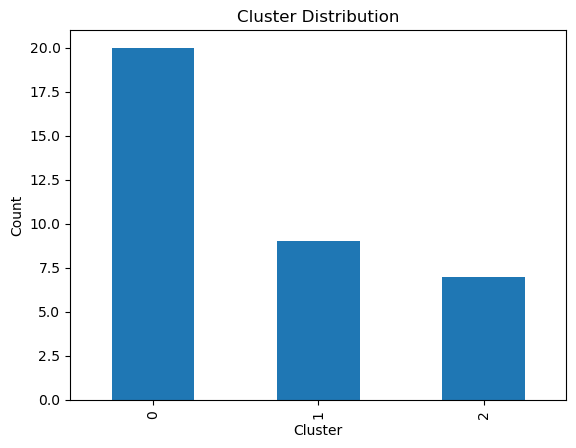

In [18]:
# Visualize the distribution of clusters
cluster_counts = data_cluster['Cluster'].value_counts()
cluster_counts.plot(kind='bar', xlabel='Cluster', ylabel='Count', title='Cluster Distribution')
plt.show()

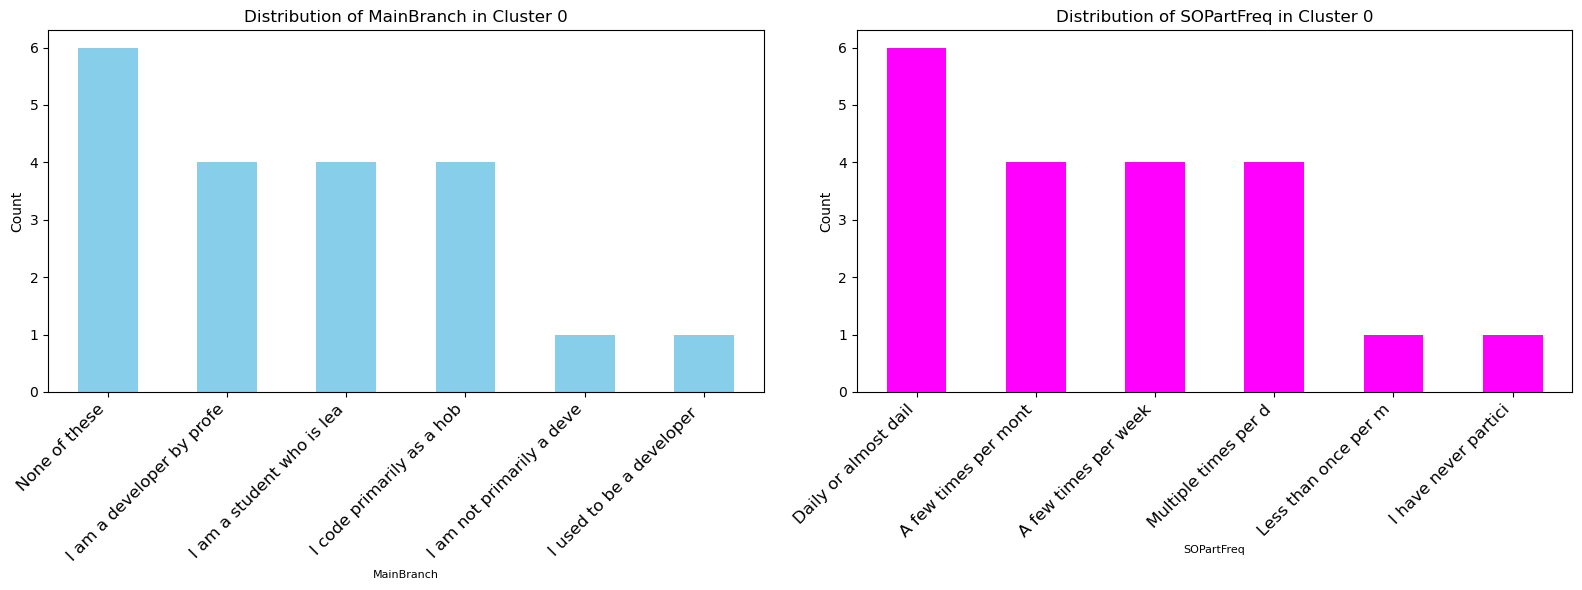

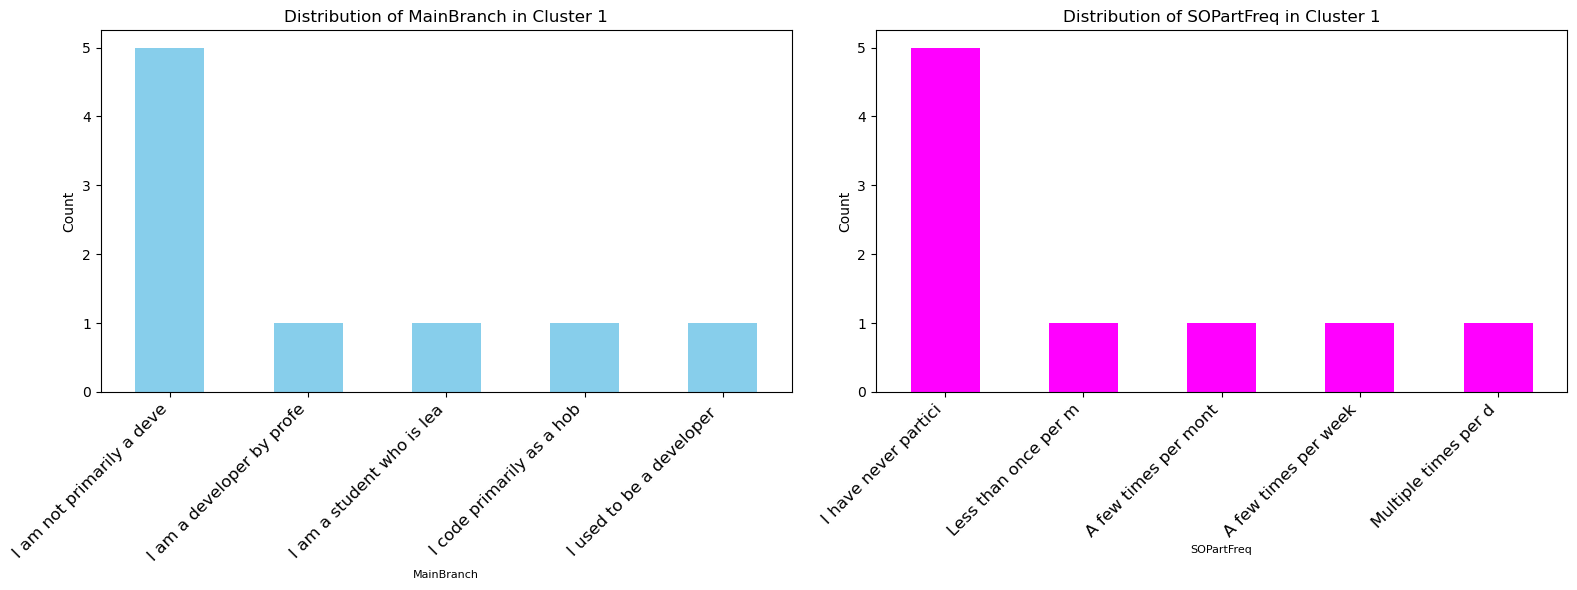

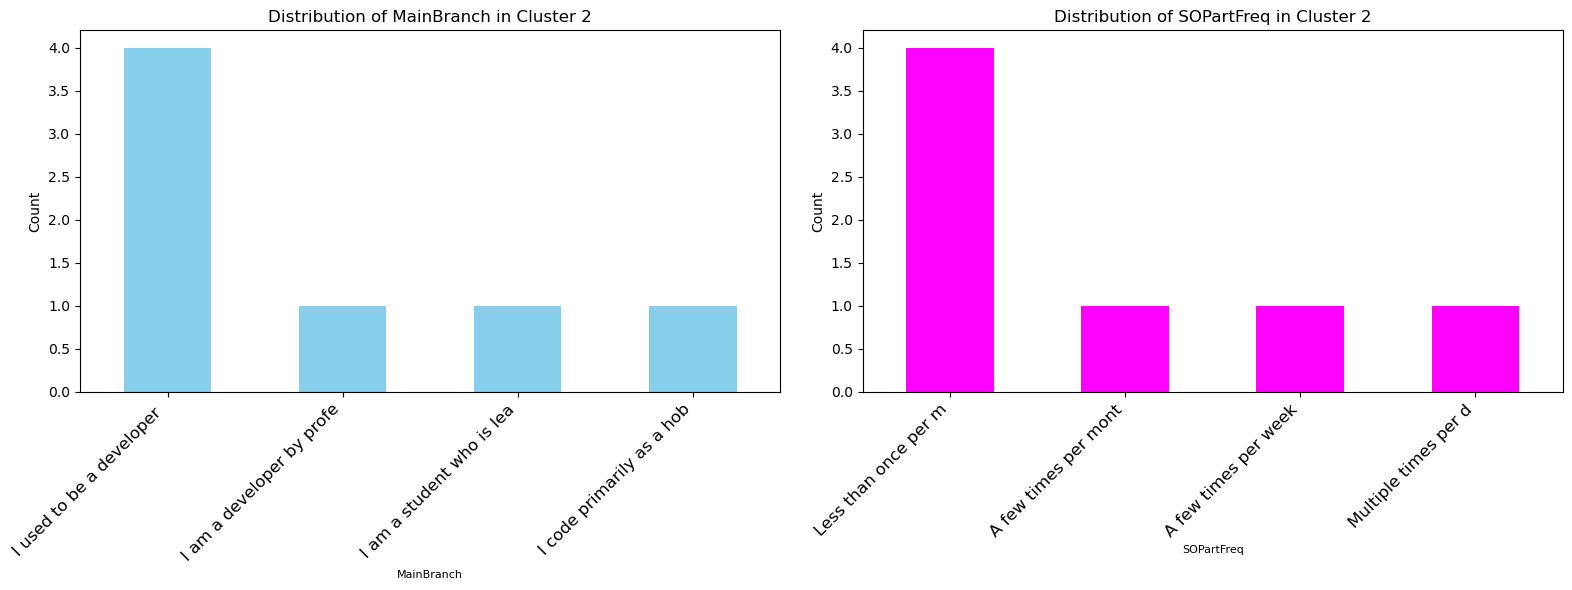

In [19]:
# Set the number of subplots per row
subplots_per_row = 2

# Categorical variable distribution for each cluster
for name, group in grouped_df.groupby("Cluster"):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot MainBranch distribution
    axes[0].set_title(f'Distribution of MainBranch in Cluster {name}')
    main_branch_labels = [label[:25] for label in group['MainBranch'].value_counts().index]  # Display only the first 10 characters
    group['MainBranch'].value_counts().plot(kind='bar', color='skyblue', ax=axes[0])
    axes[0].set_xlabel('MainBranch', fontsize=8)
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(main_branch_labels, rotation=45, ha='right', fontsize=12)  # Set rotation and font size
    
    # Plot SOPartFreq distribution
    axes[1].set_title(f'Distribution of SOPartFreq in Cluster {name}')
    sofreq_labels = [label[:20] for label in group['SOPartFreq'].value_counts().index]  # Display only the first 10 characters
    group['SOPartFreq'].value_counts().plot(kind='bar', color='magenta', ax=axes[1])
    axes[1].set_xlabel('SOPartFreq', fontsize=8)
    axes[1].set_ylabel('Count')
    axes[1].set_xticklabels(sofreq_labels, rotation=45, ha='right', fontsize=12)  # Set rotation and font size
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the subplots
    plt.show()


### Interpretation of Clustering Results 

Based on the clustering results and the initial analysis, here are some initial conclusions:

#### Number of Clusters:

The K-modes clustering methodology identified **3 clusters among the 36 different combinations** of MainBranch and SOPartFreq.
These clusters represent distinct groups or personas based on the respondents' behaviors related to their profession and frequency of participating in Stack Overflow discussions.


#### Main Personas:

1. **Cluster 0 Dominance:** With over 50% distribution, Cluster 0 likely represents the most common behavior or persona among the respondents. Those are people that are usually people who are learning, they are beginning they process of learning programming or has do it as a hobby. Those users are not professionals. They are usually interacting either daily or once month, probably depending on the level of proviciency and stage of learning programming. 

2. **Cluster 1 Characteristics:** The characteristics of respondents in Cluster 1, representing around 25%, may differ from the majority. Vast majority of the users from this cluster are not programmers, rather they write code sometimes as part of their work. Those users are less active users, not participating often in discussion, they are interacting on monthly basis or even more rarely. 

3. **Cluster 2 Distinctiveness:** The smallest cluster, Cluster 2, may represent a niche group with specific patterns of MainBranch and SOPartFreq. Those are the professionals, who are working daily as a programmers. They tend to engage into Stack Overflow discussions even few times per week, which makes then quite engaged users of the platforms. 

Overall, the clustering results provide a valuable segmentation of respondents into distinct personas, offering a foundation for more in-depth analysis and targeted strategies based on the identified clusters.

### DEFINITION OF PROGRAMMER BASED ON THE STACK OVERFLOW DATA 

Based on the conducted analysis of Stack Overflow users' habits we can define 3 the most common behaviors, that we can group into specific personas. In this context, we understands a persona, as a collection of characteristics and behaviour that can be grouped and described as a specific user. Persona is a user with specifc habits, platform activity and characterstic. 

Based on analysis conducted with the help of Stack Overflow Developers Survey, we were able to distinguish three programmers personas. Each of them are type of programmer, but has different habits and behaviours related to usage and acitivty on Stack Overflow disucssion. 
To map them correctly we need to define what are similarities and differences between then, and how data that we have collected may help them distinguish them in out default dataset. 

We have defined three different personas: 

1. **Expert** 
 - They are profesional developers. Answers the questions and participare in discussion. They are knowledgable and experienced. 
 - High activity - they participate in Stack Overflow discussion few times per week.   
 
2. **Enthusiast Programmers** 
 - They are not professionals programmers but they can code, and they use it for their job if needed. Usually ask the questions,    trying to find out new solutions, to their current problems.
   exploring new methods and techniques.  
 - Medium / low activity - they participate in Stack Overflow discussion a few times per month or monthly. 	
 
3. **Follower / Late Adapter** 
 - Those are the learners, beginning developers or students. They react on already answered questions, 
   inlcuding ups, downs & comments the questions.  
 - Low activity - mostly browsing, not participating. They participate almost daily in the discussion and interact with users.

Now, as we have defined successfully our programmers personas, we should try to translate them into our original dataset to estimate a number or Programmers in the NUTS3 regions based on the Stack Overflow Activity Data. 

To achieve that we should focus on type of activities that we are recording and define for each one of them how it should be treated in order to present in a best way, reality and estimate the number of programmers. 

##### Experts

- **answercount**: this variable define "Experts". The dataset contains data aggregated by year, therefore we should account for                    that. Regarding to the data from SO Survey from 2021. Experts are participating in SO discussions usually                        monthly. Hence to define how many experts are located in the specific NUTS region, we should divide total                        answer count in a region per 12 months, and multiple by 8 (as a equivalent of "few times per week"). This                        will give us final number of Experts in this NUTS3 Region. 


##### Enthusiast Programmers 

- **questioncount**: this variable define "Early Innovators". Regarding to the data from SO Survey from 2021. Early Innovators                        are participating in SO discussions usually few times per month. Hence to define how many innovators are                        located in the specific NUTS region, we should divide total question count in a region per 12 months. This                      will give us final number of Experts in this NUTS3 Region. 

##### Late Adopters 

- **upvotecount; 
  downvotecount; 
  commentcount**: those variables define "Late Adopters". Those are early developers or students who are learning to code. Those                   users are not participating very frequently, usually weekly.  Hence to define how many innovators are located                   in the specific NUTS region, we should divide total question count in a region per 12 months and multiple by                     15 times (as a equivalent of "almost daily"). This will give us final number of Experts in this NUTS3 Region.  
              

In [20]:
path = os.path.join("FINAL_no_TR.xlsx")

# Read the Excel file
FINAL_no_TR = pd.read_excel(path)

# Display the first few rows
FINAL_no_TR.head()

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS)
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82


In [21]:
#Defining number of programmers in each region based on the assumption made

weeks_in_year = 52
months_in_year = 12

#Experts in Region 
FINAL_no_TR["Experts"] = (FINAL_no_TR["answercount"] / (weeks_in_year*2))

#Innovators in Region
FINAL_no_TR["Innovators"] = FINAL_no_TR["questioncount"] / months_in_year

# Late Adopters in Region
FINAL_no_TR["Late_Adopters"] = ((FINAL_no_TR["upvotecount"] +  FINAL_no_TR["downvotecount"] + FINAL_no_TR["commentcount"])/ (months_in_year*15))

#Delete unnecessary columns and sum up all Developers
FINAL_no_TR.drop(columns = ["answercount", "questioncount", "upvotecount", "downvotecount", "commentcount"])
FINAL_no_TR["Programmers_Total"] = FINAL_no_TR["Experts"] + FINAL_no_TR["Innovators"] + FINAL_no_TR["Late_Adopters"] 

FINAL_no_TR

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Experts,Innovators,Late_Adopters,Programmers_Total
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60,1.605769,7.166667,0.177778,8.950214
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84,22.028846,30.833333,42.805556,95.667735
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17,39.163462,138.166667,114.083333,291.413462
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88,58.067308,156.333333,179.638889,394.039530
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82,60.192308,268.833333,261.605556,590.631197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,2016,Östergötland County,SE,4512,3147,18061,1583,14559,SE123,212.000,18408.070000,16305.800000,449.00,30.259615,376.000000,190.016667,596.276282
3948,2017,Östergötland County,SE,3633,3263,16235,1506,11172,SE123,217.000,18787.460000,16657.120000,454.99,31.375000,302.750000,160.627778,494.752778
3949,2018,Östergötland County,SE,3683,2516,19716,1875,14176,SE123,224.000,18855.660000,16710.180000,460.01,24.192308,306.916667,198.705556,529.814530
3950,2019,Östergötland County,SE,2957,2037,19970,1243,9206,SE123,226.000,18820.580000,16714.730000,464.00,19.586538,246.416667,168.994444,434.997650


In [22]:
top_regions = FINAL_no_TR.groupby('nuts3_name')['Programmers_Total'].sum().sort_values(ascending=False).head(10)
print(top_regions)

nuts3_name
Paris                     83056.423291
Stockholm County          53831.461966
Zürich                    43990.430128
Madrid                    39792.683761
Barcelona                 35911.793590
Milan                     27925.956624
Rome                      24499.676496
Västra Götaland County    21556.108974
Skåne County              19981.746795
Hauts-de-Seine            19416.250214
Name: Programmers_Total, dtype: float64


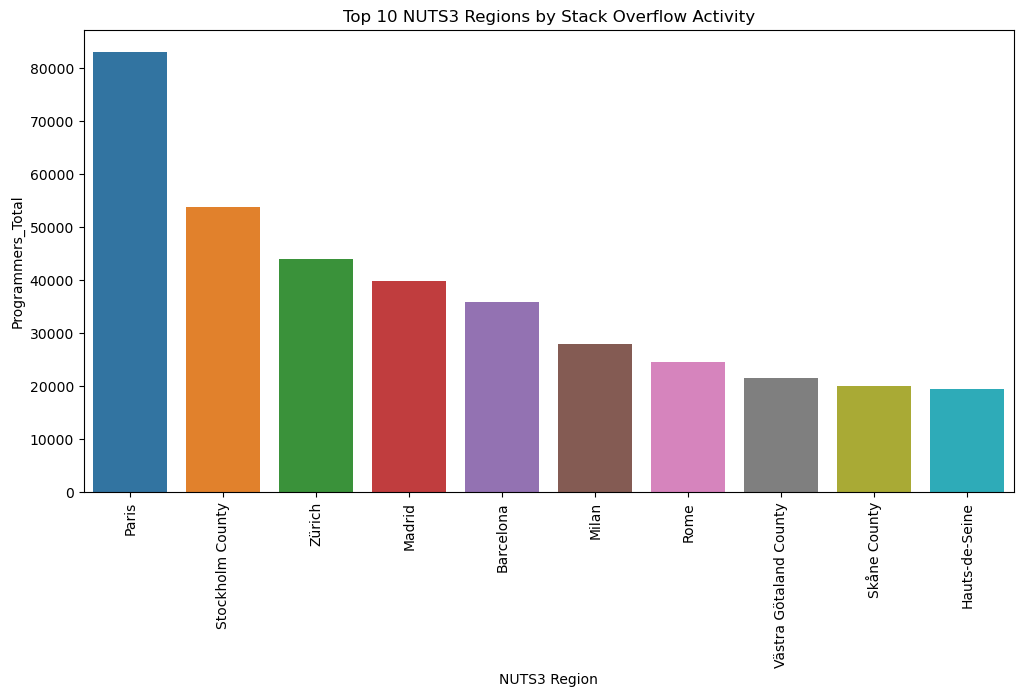

In [23]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title('Top {} NUTS3 Regions by Stack Overflow Activity'.format(10))
plt.xlabel('NUTS3 Region')
plt.ylabel('Programmers_Total')
plt.xticks(rotation=90)
plt.show()

To analyze simple relations between specific NUTS3 we have performed simple visualisation of the amount of Programmers across examineted regions. 

1. **Paris has the highest estimated number of programmers (83056.42)**
This indicates that Paris has a significant programming community, at least based on total number of programmers.

2. **Stockholm County and Zürich follow with substantial numbers (53831.46 and 43990.43, respectively)**
Both Stockholm County and Zürich also seem to have sizable programming communities.

3. **Madrid, Barcelona, Milan, and Rome have notable figures, but lower than the top three.**
These cities still have substantial estimated numbers of programmers, suggesting active programming communities.

4. **Västra Götaland County and Skåne County have moderate numbers.**
These regions have a moderate presence of programmers based on your estimates.

5. **Hauts-de-Seine has a relatively lower figure compared to others on the list (19416.25).**
While lower in comparison, it still indicates a presence of programmers in this region.

It's important to note that these are estimated figures, and the accuracy of the estimation depends on the method used to calculate the number of programmers. Additionally, local factors such as the size of the population, the prominence of the tech industry, and educational institutions could influence these numbers.

In [24]:
FINAL_no_TR['Programming_Density'] = FINAL_no_TR['Programmers_Total'] / (FINAL_no_TR['POP (THS)'] * 1000)
top_regions_str = FINAL_no_TR.groupby('nuts3_name')['Programming_Density'].sum().sort_values(ascending=False).head(10)
top_regions_str

nuts3_name
Balearic Islands    0.080089
Paris               0.037885
Zürich              0.029847
La Palma            0.029285
Stockholm County    0.024201
Zug                 0.023266
Basel-Stadt         0.022976
Genève              0.019536
Vaud                0.016858
Skåne County        0.015317
Name: Programming_Density, dtype: float64

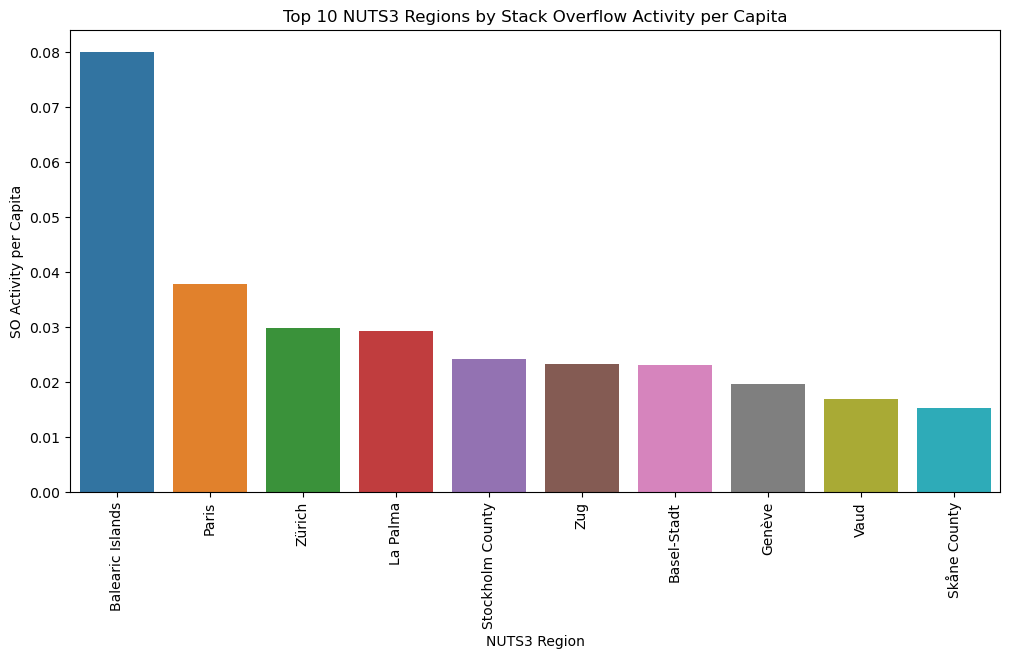

In [25]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions_str.index, y=top_regions_str.values)
plt.title('Top {} NUTS3 Regions by Stack Overflow Activity per Capita'.format(10))
plt.xlabel('NUTS3 Region')
plt.ylabel('SO Activity per Capita')
plt.xticks(rotation=90)
plt.show()

These figures represent the estimated density of programmers in each region relative to the population. Here are some observations:

**1. Balearic Islands have the highest number of programmers per capita (0.080089).**

This indicates that, relative to the population, Balearic Islands have a higher concentration of programmers compared to other regions on the list. It is interecting finding taking into consideration that those islands are most famous from tourism rather than technology, hence we can make a conclusion that this high density is caused by the number of digital nomads that are visiting or vacationing in those areas. 

**2. Paris and Zürich follow with lower values (0.037885 and 0.029847, respectively).**

While Paris and Zürich have high total numbers of programmers (as observed in the previous analysis), their per capita values are lower, suggesting that their large populations contribute to the overall number of programmers.

Besides Balearic Island, rest of the locations with highest density tends to be technological hubs in the Europe, those are the cities and location that attract lots of programmers because of the presence of technological companies. 

It's important to consider that per capita values provide insights into the concentration of programmers relative to the population size. A higher per capita value suggests a higher concentration of programmers in relation to the region's population, hence some of those findings are very interesting. In order to deep dive into the relations between that, we need to investigate the effect of density of programmers on Gross Domestic Product and how those changes over the time. 

In [26]:
top_locations_per_year = FINAL_no_TR.groupby('year').apply(lambda x: x.nlargest(10, 'Programming_Density')).reset_index(drop=True)
top_locations_per_year

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Experts,Innovators,Late_Adopters,Programmers_Total,Programming_Density
0,2008,La Palma,ES,39,348,0,0,433,ES707,32.600,1584.750000,1460.500000,83.00,3.346154,3.250000,2.405556,9.001709,0.000108
1,2008,Stockholm County,SE,937,5033,0,0,2140,SE110,1124.000,104666.790000,92682.110000,1964.92,48.394231,78.083333,11.888889,138.366453,0.000070
2,2008,Blekinge County,SE,37,421,0,0,243,SE221,70.000,5043.440000,4465.950000,151.99,4.048077,3.083333,1.350000,8.481410,0.000056
3,2008,Basel-Stadt,CH,57,370,0,0,297,CH031,93.719,19111.357999,18409.572157,185.95,3.557692,4.750000,1.650000,9.957692,0.000054
4,2008,Guadalajara,ES,115,196,0,0,108,ES424,98.500,4912.110000,4527.000000,241.80,1.884615,9.583333,0.600000,12.067949,0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2020,Stockholm County,SE,32227,35318,197190,25345,141595,SE110,1298.000,153963.040000,136663.360000,2385.10,339.596154,2685.583333,2022.944444,5048.123932,0.002117
126,2020,Basel-Stadt,CH,2551,2629,20490,682,7531,CH031,100.639,35228.958199,34045.157731,196.29,25.278846,212.583333,159.461111,397.323291,0.002024
127,2020,Zug,CH,1259,1130,15990,757,3972,CH066,70.383,18984.640419,18267.547912,128.22,10.865385,104.916667,115.105556,230.887607,0.001801
128,2020,Vaud,CH,7047,7722,51000,5194,36217,CH011,415.954,52735.393712,51464.487387,809.93,74.250000,587.250000,513.394444,1174.894444,0.001451


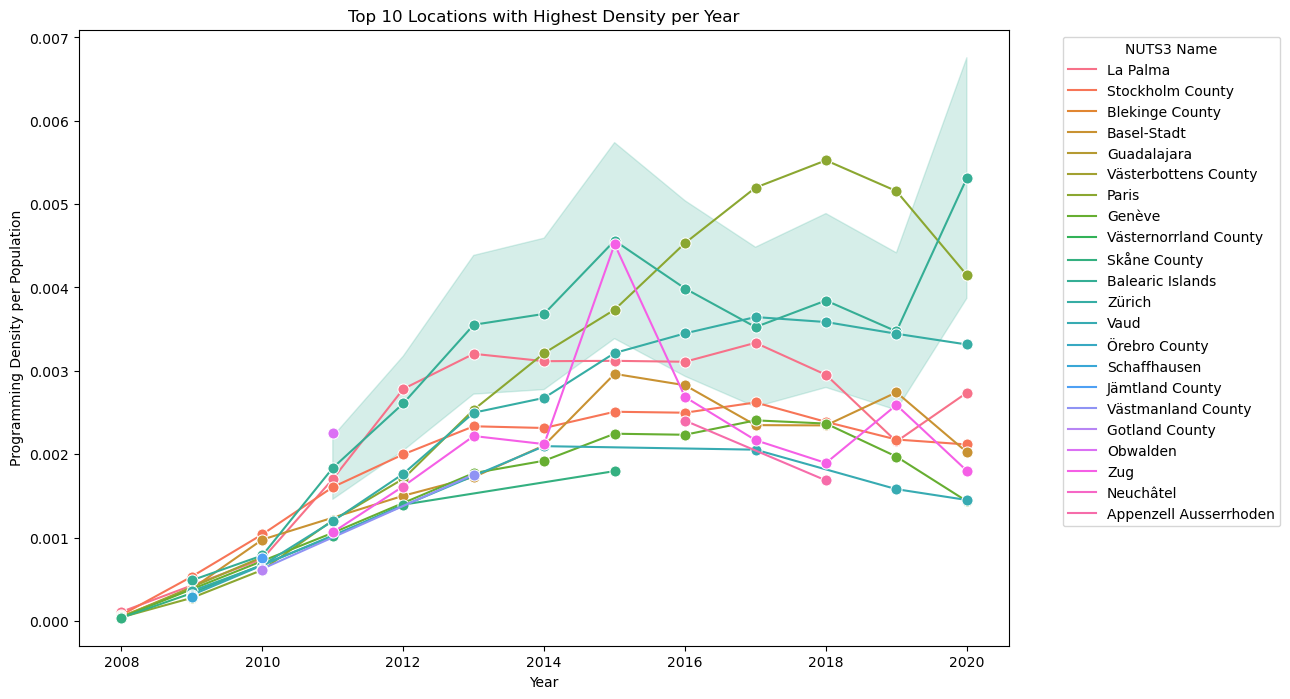

In [27]:
# Define a color palette with distinct colors for each location
palette = sns.color_palette("husl", n_colors=top_locations_per_year['nuts3_name'].nunique())

# Line plot for the top 10 locations with highest density per year
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='Programming_Density', hue='nuts3_name', data=top_locations_per_year, marker='o', markersize=8)
plt.title('Top 10 Locations with Highest Density per Year')
plt.xlabel('Year')
plt.ylabel('Programming Density per Population')
plt.legend(title='NUTS3 Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Total Programmers per Population Over the Year 

The majority of cities and regions consistently ranked in the top 10 from 2008 to 2020 are predominantly large European cities, with a significant concentration in Switzerland. Although some cities sporadically entered the top 10, the majority maintained a substantial density of programmers throughout the entire period. This suggests that programmers tend to stay in these locations, indicating that the technological development of cities is a long-term process spanning years, if not decades.

While the top cities remained relatively stable over the years, the data reveals a growth in the density of programmers within these cities. This implies an overall increase in the number of programmers, but notably, this growth occurs within the same cities that continue to attract and retain a high programmer population.

In summary, the top cities have shown consistency over the years, especially between 2008 and 2013 when they housed a similar number of programmers. Post-2013, there is a discernible surge in the density of programmers, with certain cities emerging as leaders in this regard, and this pattern has endured in the subsequent years.

In [30]:
# Calculate density per population and GDP
FINAL_no_TR['Programmer_Density_GDP'] = FINAL_no_TR['Programmers_Total'] / FINAL_no_TR['GDP (MIO_EUR)']

# Group by year and nuts 3 region, calculate mean density values
mean_density_by_gdp = FINAL_no_TR.groupby(['year', 'nuts3_name']).mean().reset_index()

# Rank the regions based on mean density
mean_density_by_gdp = mean_density_by_gdp[["year", "Programmer_Density_GDP", "nuts3_name"]].sort_values(by='Programmer_Density_GDP', ascending=False)

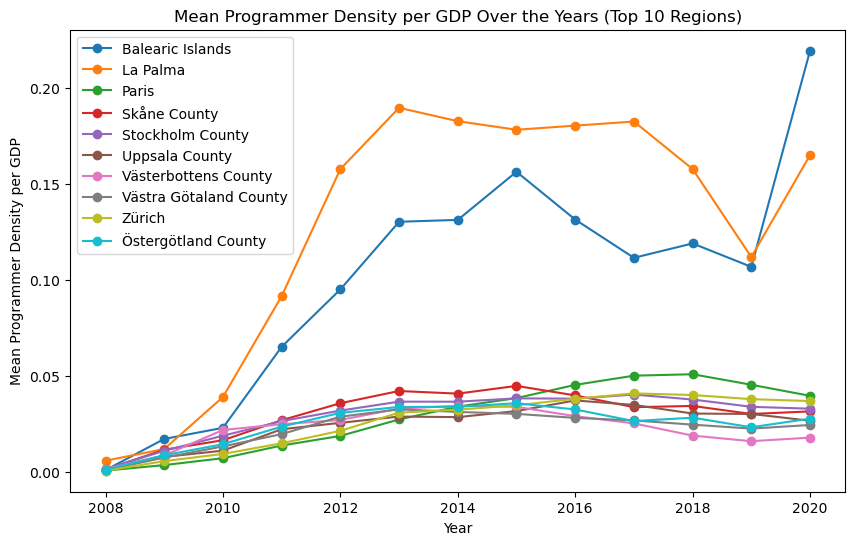

In [62]:
# Filter out top 10 regions based on mean programmer density per population
top_10_regions_gdp = mean_density_by_gdp.groupby('nuts3_name').mean().nlargest(10, 'Programmer_Density_GDP').index
filtered_data_gdp = mean_density_by_gdp[mean_density_by_gdp['nuts3_name'].isin(top_10_regions_gdp)]

filtered_data_gdp = filtered_data_gdp.sort_values(by='year')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for region, data in filtered_data_gdp.groupby('nuts3_name'):
    ax.plot(data['year'], data['Programmer_Density_GDP'], label=region, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Mean Programmer Density per GDP')
ax.set_title('Mean Programmer Density per GDP Over the Years (Top 10 Regions)')
ax.legend()

plt.show()

#### Total Programmers per GDP Over the Years (2008-2020)

The data presents the density of programmers per GDP (Gross Domestic Product) for various regions in the year 2020. Here are some key observations and analysis:

**Balearic Islands have the highest programmer density per GDP.**
Balearic Islands stand out as having the highest concentration of programmers relative to the region's economic output.
La Palma follows with a notable programmer density (0.165009). La Palma also demonstrates a high density of programmers per GDP, indicating a significant presence of programmers relative to the economic activity in the region.

**Paris and Zürich have relatively lower values.**

While Paris and Zürich have high programmer densities, their values are comparatively lower than the top-ranking regions.
Stockholm County, Skåne County, and Barcelona also have notable programmer densities.

Programmer density per GDP can provide insights into the efficiency of the local tech industry and its contribution to the overall economic activity. Higher values could indicate a more tech-focused economy, while lower values might suggest a larger, more diverse economic base. 

In [63]:
top_10_regions_gdp.to_list()

['La Palma',
 'Balearic Islands',
 'Skåne County',
 'Stockholm County',
 'Paris',
 'Zürich',
 'Östergötland County',
 'Uppsala County',
 'Västerbottens County',
 'Västra Götaland County']

In [64]:
FINAL_no_TR["GDP_per_capita"] = FINAL_no_TR["GDP (MIO_EUR)"] / FINAL_no_TR["POP (THS)"]

# Select rows where the 'nuts3_name' column is in the list of top 10 regions by GDP
top_cities = FINAL_no_TR[FINAL_no_TR["nuts3_name"].isin(top_10_regions_gdp)]
top_cities = top_cities.groupby("nuts3_name").sum()

# Display specific columns for the selected top cities
selected_columns = ["GDP_per_capita", "GDP (MIO_EUR)"]
top_cities[selected_columns]

,GDP_per_capita,GDP (MIO_EUR)
nuts3_name,,
Balearic Islands,882.592508,3.680901e+05
La Palma,234.744576,1.966985e+04
Paris,1251.854683,2.762210e+06
Skåne County,498.604746,6.451832e+05
Stockholm County,798.374734,1.747272e+06
Uppsala County,542.230463,1.912840e+05
Västerbottens County,496.692989,1.309695e+05
Västra Götaland County,568.869918,9.316845e+05
Zürich,1075.703006,1.553141e+06


Analyzing GDP per capita is important because it provides insights into the average economic well-being of individuals in a specific region. Overll Gross Domestic Product is not a good indicator of overall productivity of the region. 

 - **Standard of Living:** GDP per capita serves as an indicator of the average standard of living in a region. Higher GDP per capita generally correlates with better living standards, as it indicates a greater amount of economic output per person.
 
 - **Economic Development:** Comparing GDP per capita across different regions or over time helps assess economic development and growth. Increasing GDP per capita suggests improvements in productivity, infrastructure, and overall economic advancement.

- **Income Distribution:** While GDP per capita provides an average, it also highlights disparities in income distribution. Regions with high GDP per capita may still face issues if the wealth is concentrated in a few hands, prompting a deeper examination of income inequality.

- **Investment Attractiveness:** Businesses and investors often consider GDP per capita when making decisions about where to invest. Regions with higher GDP per capita may be perceived as more attractive markets with greater purchasing power.

In summary, analyzing GDP per capita is crucial for assessing the economic health of a region, understanding the standard of living, guiding policy decisions, attracting investments, and gauging the overall prosperity and development of a population.
Therefore, we should based our conclusion on the GDP per capita to more precisely assess economical growth and resistance of the specific region, and how programming activity affect their overall well-being and productiveness of region. 

Regions like Balearic Islands and La Palma demonstrate particularly high programmer density, showcasing the importance of considering the economic context when assessing the concentration of programmers in a given area.
Both Balearic Islands and La Palma exhibit high programmer density per GDP despite having lower GDP per capita.
This suggests that these regions have a relatively robust tech industry, contributing significantly to their economic output despite having a lower overall GDP per capita.

Paris and Zurich, while having lower programmer density per GDP compared to Balearic Islands and La Palma, are major economic hubs with higher GDP per capita.
The higher GDP per capita in Paris and Zurich indicates a more diverse and economically developed landscape, likely influenced by industries beyond technology.
Key Considerations:

Balearic Islands and La Palma might be leveraging their tech sectors efficiently, contributing disproportionately to their economic activity.
Paris and Zurich, being major global economic centers, have diverse economies where the tech industry is one of many contributors.
Implications:

Balearic Islands and La Palma's ability to maintain high programmer density per GDP with lower overall GDP per capita could signify a strategic emphasis on the tech sector as a key economic driver.
Paris and Zurich, with their economic diversity, may rely on a broader range of industries for their economic strength.
In summary, the comparison suggests that Balearic Islands and La Palma are achieving notable programmer density per GDP despite lower GDP per capita, potentially indicating a focused and efficient tech industry. Paris and Zurich, with lower programmer density per GDP, showcase their economic strength through a more varied economic landscape. The context of these findings would benefit from additional insights into the specific industries driving economic activity in each region.

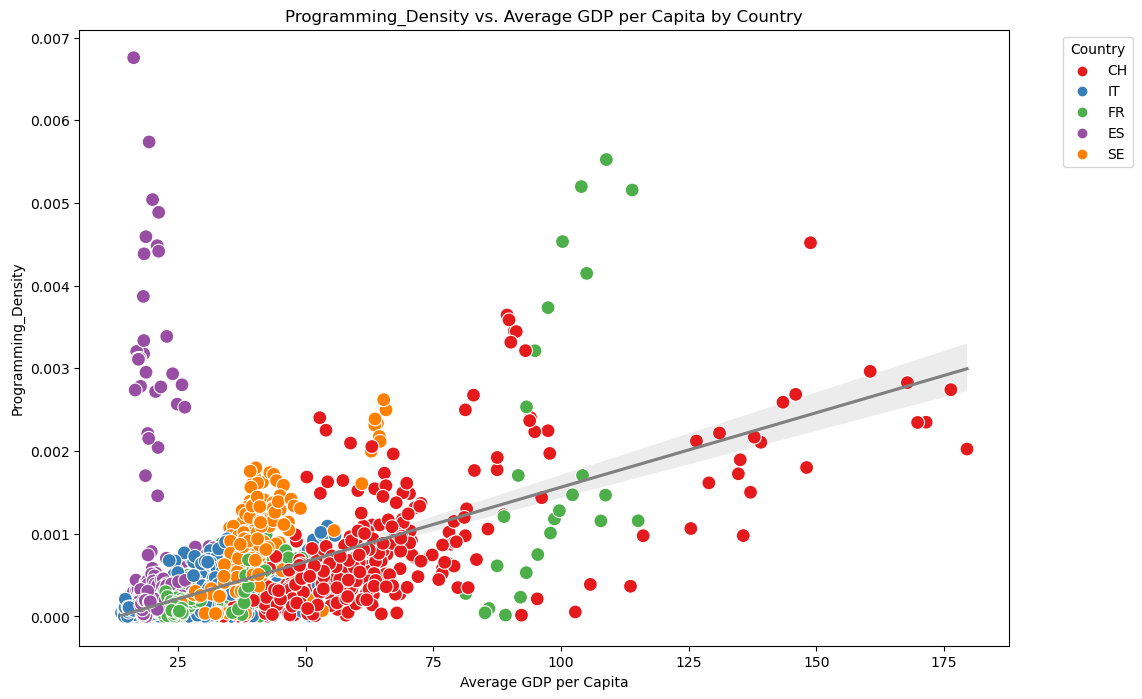

In [34]:
# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))

# Draw the regression line using regplot
sns.regplot(x='GDP_per_capita', y='Programming_Density', data=FINAL_no_TR, scatter=False, color='gray')

# Overlay the scatter plot with different colors for each NUTS 2 region
sns.scatterplot(x='GDP_per_capita', y='Programming_Density', hue='country', data=FINAL_no_TR, palette='Set1', s=100)

# Adding titles and labels
plt.title('Programming_Density vs. Average GDP per Capita by Country')
plt.xlabel('Average GDP per Capita')
plt.ylabel('Programming_Density')

# Adding legend outside the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

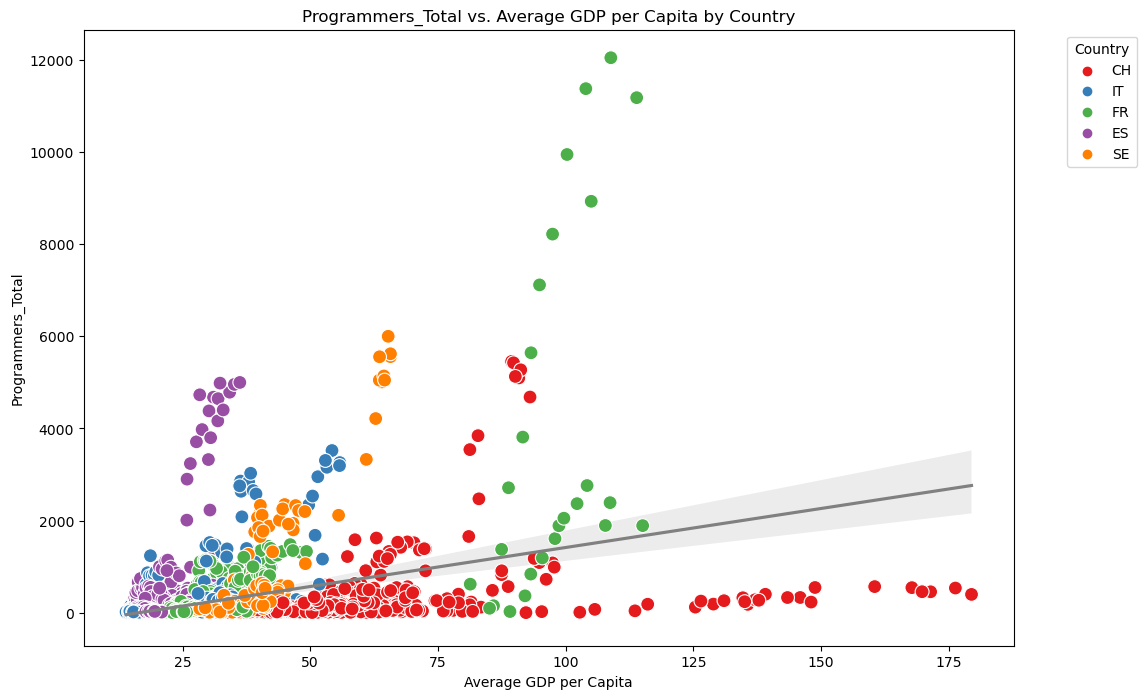

In [35]:
# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))

# Draw the regression line using regplot
sns.regplot(x='GDP_per_capita', y='Programmers_Total', data=FINAL_no_TR, scatter=False, color='gray')

# Overlay the scatter plot with different colors for each NUTS 2 region
sns.scatterplot(x='GDP_per_capita', y='Programmers_Total', hue='country', data=FINAL_no_TR, palette='Set1', s=100)

# Adding titles and labels
plt.title('Programmers_Total vs. Average GDP per Capita by Country')
plt.xlabel('Average GDP per Capita')
plt.ylabel('Programmers_Total')

# Adding legend outside the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

#### Amount of Programmers and their effect on the Gross Domestic Product in NUTS3 Regions 

The scatter plot visualization indicates a consistent correlation between both the total number of programmers and programmers' density per population with Gross Domestic Product (GDP) per Capita. This correlation suggests that technologically advanced areas generally exhibit higher productivity, an elevated average income among the local population, and attractiveness for future investments. These regions often boast an educated and technology-enabled workforce, serving as catalysts for ongoing development.

Notably, certain regions, such as Spain and France, show a higher presence of programmers compared to the average GDP per capita. This phenomenon could be attributed to the rising popularity of remote work, particularly within the programming community. Remote work allows professionals to work from smaller and more cost-effective regions while contributing to major companies based in cities like Madrid.

Alternatively, the higher presence of programmers in regions with lower average GDP per capita might be influenced by housing challenges in these countries. Many individuals, unable to afford city living, may relocate to suburban or outlying areas. The granularity of our analysis at the NUTS3 level enables the identification of such locations.

In summary, the observed correlations between programmer metrics and GDP per capita highlight the role of technology in fostering economic development. The nuances in certain regions, like Spain and France, underscore the impact of remote work trends and housing dynamics on the distribution of programmers across different areas around the cities, that are being habitated by people who cannot afford to live in the city itself. 

For understanding a bigger picture, we should analyze further the amount of programmers with total employement to see how many of employed people are being programming literate. 

In [66]:
FINAL_no_TR["Employed_Programmers"] = FINAL_no_TR['Programmers_Total'] / (FINAL_no_TR['EMP (THS)']*1000)
top_employed = FINAL_no_TR.groupby('nuts3_name')['Employed_Programmers'].sum().sort_values(ascending=False).head(10)
print(top_employed)

nuts3_name
Balearic Islands    0.223305
La Palma            0.087245
Zürich              0.051999
Basel-Stadt         0.043895
Stockholm County    0.042912
Paris               0.041660
Genève              0.041126
Zug                 0.040948
Skåne County        0.033379
Vaud                0.032007
Name: Employed_Programmers, dtype: float64


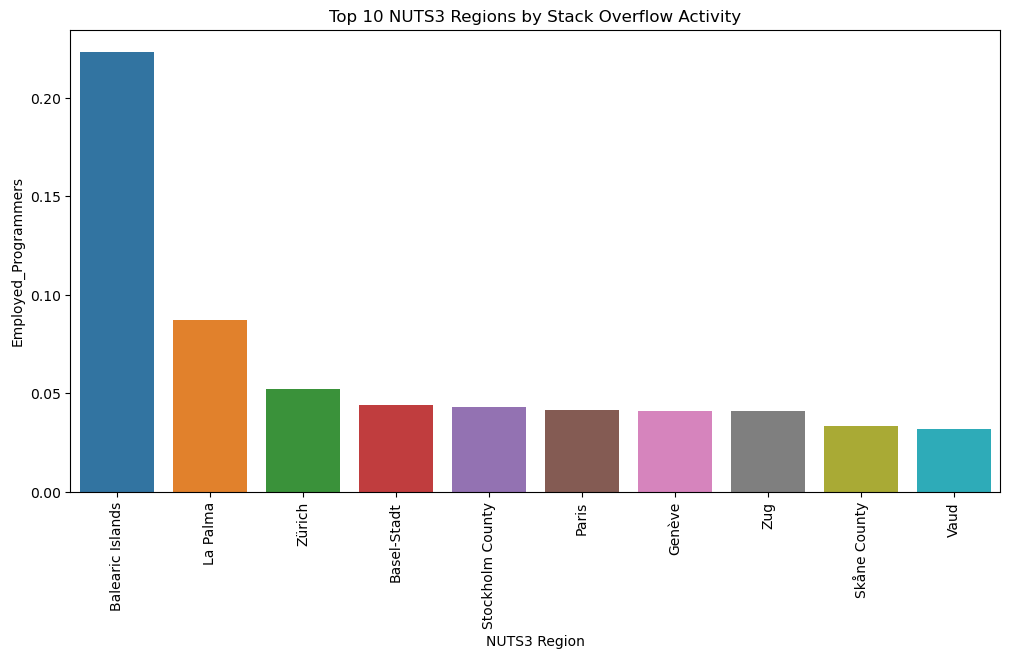

In [69]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_employed.index, y=top_employed.values)
plt.title('Top {} NUTS3 Regions by Stack Overflow Activity'.format(10))
plt.xlabel('NUTS3 Region')
plt.ylabel('Employed_Programmers')
plt.xticks(rotation=90)
plt.show()

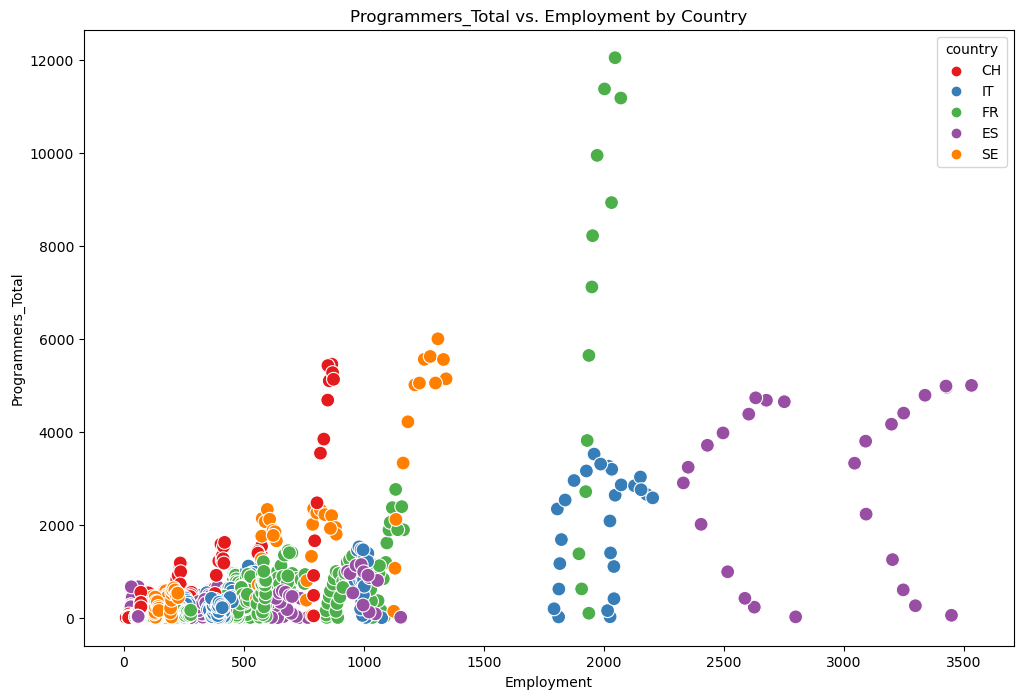

In [36]:
# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))

# Overlay the scatter plot with different colors for each NUTS 2 region
sns.scatterplot(x='EMP (THS)', y='Programmers_Total', hue='country', data=FINAL_no_TR, palette='Set1', s=100)

# Adding titles and labels
plt.title('Programmers_Total vs. Employment by Country')
plt.xlabel('Employment')
plt.ylabel('Programmers_Total')


# Display the plot
plt.show()

In [78]:
list_cities = top_employed.index.to_list()
FINAL_no_TR['EMPL_Rate'] =  ((FINAL_no_TR['EMP (THS)']*1000) / (FINAL_no_TR["POP (THS)"]*1000))

# Select rows where the 'nuts3_name' column is in the list of top 10 regions by GDP
top_cities_empl = FINAL_no_TR[FINAL_no_TR["nuts3_name"].isin(list_cities)]
top_cities_empl = top_cities_empl.groupby("nuts3_name").sum()

# Display specific columns for the selected top cities
selected_columns = ["EMPL_Rate"]
top_cities_empl[selected_columns]

,EMPL_Rate
nuts3_name,
Balearic Islands,15.606542
Basel-Stadt,6.745192
Genève,6.216139
La Palma,4.512226
Paris,11.573852
Skåne County,5.963570
Stockholm County,7.332274
Vaud,6.869015
Zug,7.412483


Collectively, the presented ratios of programmers to the total employed population in various regions reveal notable connections:

**Tech Industry Presence:**

Regions with higher ratios, such as Balearic Islands and La Palma, showcase a strong presence of the tech industry within the employed workforce. This suggests a concentration of technology-related employment in these areas.

**Economic Hubs:**

Major economic hubs like Zürich, Basel-Stadt, Stockholm County, Paris, Genève, and Zug exhibit substantial ratios, indicating a significant tech workforce contributing to the overall employment landscape. These regions often serve as economic centers with diverse industries.Major cities like Paris and Zürich, known for their urbanization and economic significance, demonstrate higher ratios, reflecting the concentration of tech-related employment in urban centers.

Paris has a high density of programmers per population but a lower density per employment suggests several conclusions. Paris, as a major global city, likely has a diverse economic landscape with employment opportunities in various sectors. While it attracts programmers, they may not represent the majority of the employed workforce. Other industries and professions might contribute more significantly to the overall employment makeup. Also, Paris have much higher employement rate that the rest of the regions analyzed, this suggest really good economic conditions, but also could be created by the specific social enviornment in Paris, where most of the poor citizens are moving to suburbs and nearby towns, that are not longer considered as a Paris conglomeration. This why all unemployed people are being not counted, which increase overall employement rate in comparison to other similar european countries that present similar economical characteristics like Zurich or Geneva. 


**Regional Variances:**

While the overall trend indicates a tech presence in employment across various regions, there are variations in the ratios. Some regions, like Vaud and Skåne County, have relatively lower ratios, suggesting a tech presence that is notable but not as dominant as in other areas.

## Analysis of Outliers

As presented in previous analysis, we are indicating a lot of outliers, a regions that are not necessarily fit the overall tendency of technological and economical growth in Europe. 

As a next step we will identify the major outliers, location and investigate how those are different from majority of location and how are similar to each other in order to determine their characteristics. 

In [37]:
# Set thresholds for outliers
high_density_low_gdp_threshold = 0.95  # adjust as needed
low_density_high_gdp_threshold = 0.05  # adjust as needed

# Identify outliers
high_density_low_gdp_outliers = FINAL_no_TR[(FINAL_no_TR['Programming_Density'] > high_density_low_gdp_threshold) & (FINAL_no_TR['GDP_per_capita'] < FINAL_no_TR['GDP_per_capita'].quantile(0.25))]
low_density_high_gdp_outliers = FINAL_no_TR[(FINAL_no_TR['Programming_Density'] < low_density_high_gdp_threshold) & (FINAL_no_TR['GDP_per_capita'] > FINAL_no_TR['GDP_per_capita'].quantile(0.75))]

In [80]:
low_density_high_gdp_outliers

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Experts,Innovators,Late_Adopters,Programmers_Total,Programming_Density,Programmer_Density_GDP,GDP_per_capita
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60,1.605769,7.166667,0.177778,8.950214,0.000015,0.000359,42.520381
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84,22.028846,30.833333,42.805556,95.667735,0.000161,0.003740,42.934592
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17,39.163462,138.166667,114.083333,291.413462,0.000482,0.010253,47.043239
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88,58.067308,156.333333,179.638889,394.039530,0.000641,0.012103,52.948612
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82,60.192308,268.833333,261.605556,590.631197,0.000948,0.017661,53.696487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,2016,Östergötland County,SE,4512,3147,18061,1583,14559,SE123,212.000,18408.070000,16305.800000,449.00,30.259615,376.000000,190.016667,596.276282,0.001328,0.032392,40.997929
3948,2017,Östergötland County,SE,3633,3263,16235,1506,11172,SE123,217.000,18787.460000,16657.120000,454.99,31.375000,302.750000,160.627778,494.752778,0.001087,0.026334,41.292028
3949,2018,Östergötland County,SE,3683,2516,19716,1875,14176,SE123,224.000,18855.660000,16710.180000,460.01,24.192308,306.916667,198.705556,529.814530,0.001152,0.028098,40.989674
3950,2019,Östergötland County,SE,2957,2037,19970,1243,9206,SE123,226.000,18820.580000,16714.730000,464.00,19.586538,246.416667,168.994444,434.997650,0.000937,0.023113,40.561595


In [79]:
high_density_low_gdp_outliers

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Experts,Innovators,Late_Adopters,Programmers_Total,Programming_Density,Programmer_Density_GDP,GDP_per_capita


We have defined two types of outliers that we can experience. We have decided that most important metrics that are defining location's technological significance and economical resiliance / growth will be: 

 - **GDP per Capita** 
 - **Number of Programmers per Capita** 
 
 Those metrics will enable us to detect and analyze outliers and unusual locations that are recording unusually high programming activity and unusually high GDP per capita and in reverse.
 
Our analysis did not detect any outliers of locations that has both high GDP per capita and low programming density, therefore **we can make to the conclusion that in order to achieve high economical growth, resiliance and stability, technological growth and programming literacy is an important element**. We do not have enough data to determine if this is an only factor, or most significant one, but it's definitely affecting a growth of the region somehow. 

Therefore, for future outliers analysis we will focus on locations that have been recording outstandingly high programming density and low GDP per capita. 

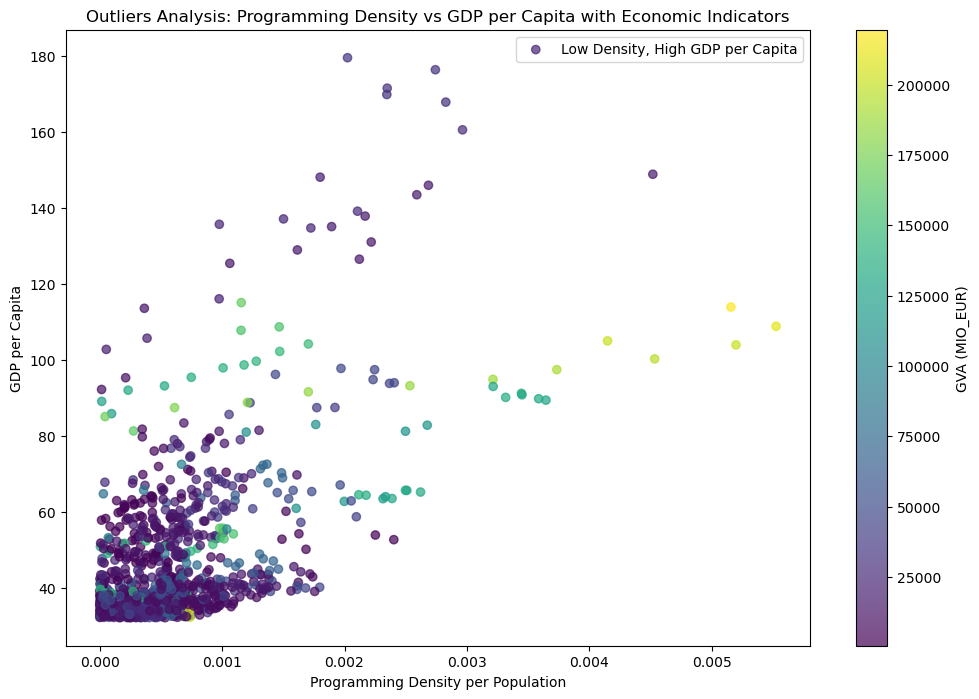

In [38]:
plt.figure(figsize=(12, 8))

# Scatter plot for low density and high GDP per capita outliers
plt.scatter(low_density_high_gdp_outliers['Programming_Density'], 
            low_density_high_gdp_outliers['GDP_per_capita'],
            c=low_density_high_gdp_outliers['GVA (MIO_EUR)'],  # Color represents GVA
            cmap='viridis',  # Choose a colormap for GVA
            alpha=0.7,  # Adjust transparency
            label='Low Density, High GDP per Capita')

# Set labels and title
plt.title('Outliers Analysis: Programming Density vs GDP per Capita with Economic Indicators')
plt.xlabel('Programming Density per Population')
plt.ylabel('GDP per Capita')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('GVA (MIO_EUR)')

# Add legend
plt.legend()

# Show the plot
plt.show()

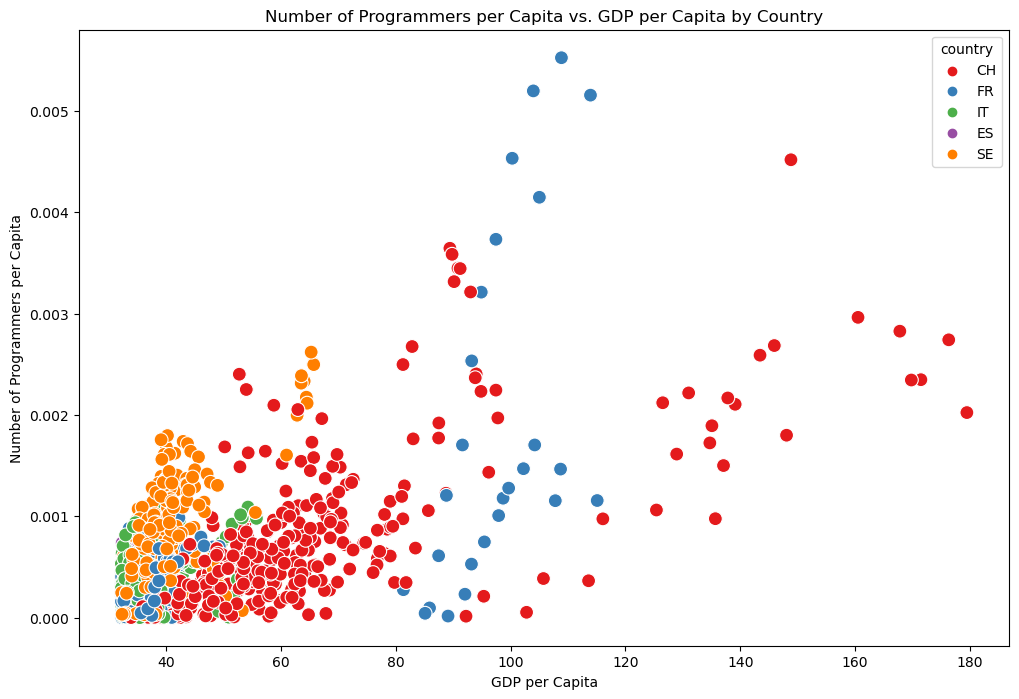

In [81]:
# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))

# Overlay the scatter plot with different colors for each NUTS 2 region
sns.scatterplot(x='GDP_per_capita', y='Programming_Density', hue='country', data=low_density_high_gdp_outliers, palette='Set1', s=100)

# Adding titles and labels
plt.title('Number of Programmers per Capita vs. GDP per Capita by Country')
plt.xlabel('GDP per Capita')
plt.ylabel('Number of Programmers per Capita')


# Display the plot
plt.show()

Among the outliers in our analysis, a majority of locations exhibit both low GDP per Capita and low Programmers Density. These regions are predominantly found in Sweden and Italy.

Conversely, there are regions recording unusually high programming density while maintaining a medium GDP per Capita, and these locations are exclusive to France. Despite having lower Gross Value Added (GVA) compared to other analyzed regions, these areas in France could be non-urban regions experiencing a surge in programming activity. This growth may not necessarily be driven by technological advancements, but rather by individuals with programming skills engaging in remote work. These regions may lack technological hubs, contributing to lower GDP.

On the other end of the spectrum, there are regions with lower programming density but high GDP per Capita, particularly in Switzerland. Notably, these regions also record relatively high GVA, indicating robust economic development and growth. Unlike the French regions with high programming density, the favorable economic conditions in these Swiss locations are likely propelled by well-developed sectors outside of programming, leading to overall regional growth.

In summary, the analysis reveals distinct patterns among outliers. Regions in Sweden and Italy show low GDP per Capita and low Programmers Density, French regions exhibit high programming density with medium GDP per Capita and lower GVA, while Swiss regions demonstrate lower programming density alongside high GDP per Capita and significant economic growth in other sectors. These findings underscore the diverse economic landscapes and varying influences of programming activity on regional development.

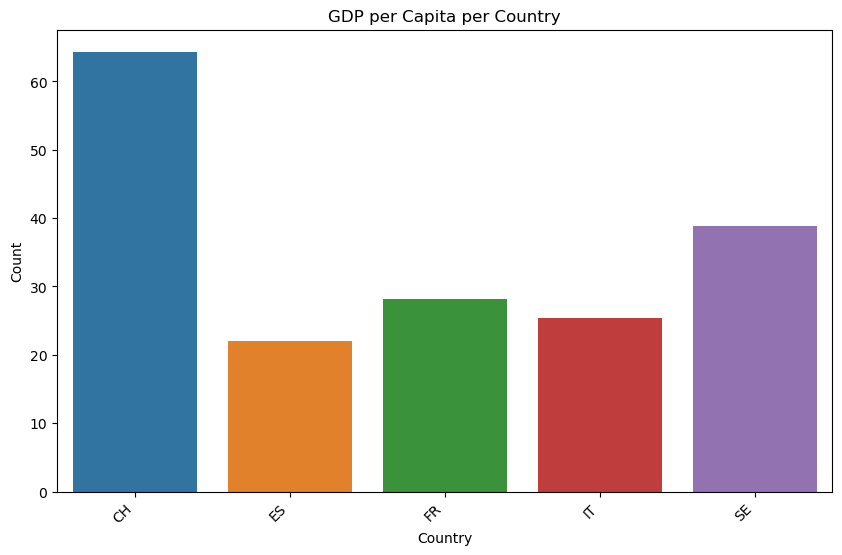

In [107]:
country = FINAL_no_TR.groupby("country").mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=country.index, y=country.GDP_per_capita)
plt.title('GDP per Capita per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [92]:
FR = low_density_high_gdp_outliers[low_density_high_gdp_outliers["country"] == "FR"]
FR = FR.groupby("nuts3_name").sum()
FR = FR.nlargest(10, 'Programming_Density')
FR

,year,questioncount,answercount,upvotecount,downvotecount,commentcount,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Experts,Innovators,Late_Adopters,Programmers_Total,Programming_Density,Programmer_Density_GDP,GDP_per_capita
nuts3_name,,,,,,,,,,,,,,,,,
Paris,26182,490914,783149,3521755,396135,2313106,25554.34,2762209.82,2470669.51,28718.36,7530.278846,40909.500000,34616.644444,83056.423291,0.037885,0.373204,1251.854683
Hauts-de-Seine,26182,112055,187679,741309,175444,572518,14406.87,2067086.40,1848837.67,20808.29,1804.605769,9337.916667,8273.727778,19416.250214,0.012041,0.117420,1289.889754
Haute-Garonne,26182,65271,87883,371888,53171,269916,8304.32,653851.31,584751.06,17234.82,845.028846,5439.250000,3860.972222,10145.251068,0.007420,0.188404,491.630192
Alpes-Maritimes,20155,47742,66144,325581,30213,200500,4616.09,369477.32,329919.73,10892.14,636.000000,3978.500000,3090.522222,7705.022222,0.007073,0.208167,339.169010
Rhône,26182,71895,123053,473734,38858,310882,12200.86,1026860.86,918406.67,23484.45,1183.201923,5991.250000,4574.855556,11749.307479,0.006388,0.142737,567.162185
Val-de-Marne,26182,55029,73800,320910,29041,224390,7446.28,653721.28,584734.53,17790.37,709.615385,4585.750000,3190.783333,8486.148718,0.006130,0.163215,477.050210
Essonne,26182,38679,67958,273544,28286,206700,6273.67,625492.81,559459.84,16463.74,653.442308,3223.250000,2825.166667,6701.858974,0.005216,0.134555,493.024893
Yvelines,26182,37456,95524,296240,32992,234094,7605.24,722817.44,646616.04,18586.60,918.500000,3121.333333,3129.588889,7169.422222,0.004982,0.125733,505.325387
Seine-Saint-Denis,24173,40679,85868,250839,39365,244092,7545.38,700566.03,626145.66,19094.31,825.653846,3389.916667,2968.311111,7183.881624,0.004455,0.118873,439.385355


These administrative departments span various regions of France, covering urban, suburban, and potentially rural areas. For instance, 'Hauts-de-Seine' is in close proximity to Paris, 'Alpes-Maritimes' (near Monaco and Cannes) encompasses part of the French Riviera, and 'Loire-Atlantique' is a historically significant city situated in the western part of the country.

Certain departments, especially those in the Paris metropolitan area such as 'Hauts-de-Seine', 'Val-de-Marne', and 'Seine-Saint-Denis', hold economic significance and may host major business districts or industrial zones. This dynamic contributes to the unusual high GDP per capita in comparison to the level of programming activity observed.

'Rhone' and 'Alpes-Maritimes' are also situated within large cities - Lyon and Cannes, respectively. These cities primarily contribute to GDP through tourism and other services rather than technology.

Conversely, regions like Essonne, Yvelines, and Haute-Garonne are smaller and more remote, situated far from major urban centers. This geographical distance may contribute to a scarcity of programmers in these areas.

In summary, the diversity among these departments in terms of proximity to urban centers, economic focus, and geographical remoteness helps explain variations in programming activity and GDP per capita across different regions of France.

In [100]:
CH = low_density_high_gdp_outliers[low_density_high_gdp_outliers["country"] == "CH"]
CH = CH.groupby("nuts3_name").sum()
CH = CH.nlargest(10, 'GDP_per_capita')
CH

,year,questioncount,answercount,upvotecount,downvotecount,commentcount,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Experts,Innovators,Late_Adopters,Programmers_Total,Programming_Density,Programmer_Density_GDP,GDP_per_capita
nuts3_name,,,,,,,,,,,,,,,,,
Basel-Stadt,26182,24705,44901,191374,17515,136097,1284.747,3.622226e+05,3.494245e+05,2475.75,431.740385,2058.750000,1916.588889,4407.079274,0.022976,0.148334,1896.485751
Zug,26182,11745,24550,131118,52052,108354,882.395,2.004587e+05,1.923152e+05,1548.77,236.057692,978.750000,1619.577778,2834.385470,0.023266,0.169034,1672.114178
Genève,26182,48306,88513,442280,74503,304704,2950.120,5.419832e+05,5.258645e+05,6173.37,851.086538,4025.500000,4563.816667,9440.403205,0.019536,0.213109,1136.501137
Zürich,26182,250925,388327,1985191,276352,1220755,10781.345,1.553141e+06,1.499504e+06,18677.33,3733.913462,20910.416667,19346.100000,43990.430128,0.029847,0.341955,1075.703006
Schaffhausen,26182,3021,3700,17995,1705,14250,558.116,7.303513e+04,7.063224e+04,1025.73,35.576923,251.750000,188.611111,475.938034,0.005992,0.081957,922.110450
Neuchâtel,26182,10952,18508,72996,9653,54000,1177.340,1.601741e+05,1.557695e+05,2276.87,177.961538,912.666667,759.161111,1849.789316,0.010504,0.142682,912.423276
Ticino,26182,17921,25335,126135,15525,78756,2153.021,3.105176e+05,3.002163e+05,4485.46,243.605769,1493.416667,1224.533333,2961.555769,0.008505,0.117596,897.397685
Bern,26182,68366,127874,538692,96954,404437,7241.553,8.354906e+05,8.098225e+05,13063.07,1229.557692,5697.166667,5778.238889,12704.963248,0.012492,0.185429,829.103790
St. Gallen,26182,27951,56147,167588,22440,166939,3570.097,3.942622e+05,3.820188e+05,6396.84,539.875000,2329.250000,1983.150000,4852.275000,0.009750,0.151472,798.639304


Switzerland has nearly 98% of its regions classified as outliers, reflecting the country's robust economic strength. As one of the foremost business and financial hubs in Europe, Switzerland boasts a significantly higher GDP per capita than most other nations.

What these regions share is a notable economic significance. Basel-Stadt, Zug, Genève, Zürich, and Ticino are recognized for hosting major financial centers and contributing significantly to Switzerland's economic growth.

Conversely, regions like Graubünden and St. Gallen, while important in their own right, may not reach the same level of economic prominence. While Graubünden, for instance, may not serve as a primary financial hub, it may excel in other sectors. Notably, when compared to other European regions, these areas still achieve a higher GDP per capita.

In summary, it is prudent to consider Switzerland as an outlier at the national level rather than focusing solely on individual regions. The country as a whole demonstrates exceptional economic prosperity, making it a standout performer in the European context.

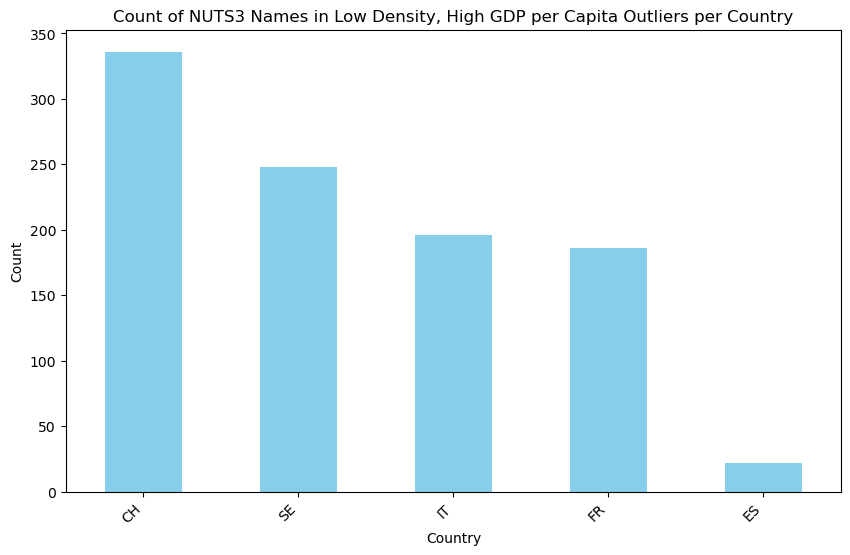

In [82]:
outliers_count_per_country = low_density_high_gdp_outliers['country'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
outliers_count_per_country.plot(kind='bar', color='skyblue')
plt.title('Count of NUTS3 Names in Low Density, High GDP per Capita Outliers per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

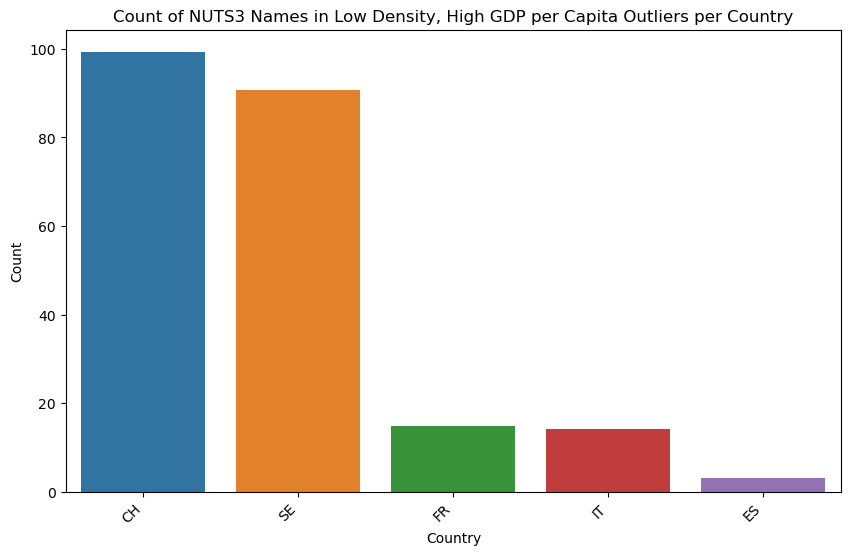

In [41]:
# Count total NUTS3 names per country in the entire DataFrame df
total_count_per_country = FINAL_no_TR['country'].value_counts()

# Create a DataFrame to compare counts
comparison_df = pd.DataFrame({
    'Outliers Count': outliers_count_per_country,
    'Total Count': total_count_per_country
})

comparison_df["Ratio"] = ((comparison_df['Outliers Count'] / comparison_df['Total Count']) * 100)

# Create a bar chart

comparison_df = comparison_df.sort_values(by = 'Ratio', ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x=comparison_df.index, y=comparison_df.Ratio)
plt.title('Count of NUTS3 Names in Low Density, High GDP per Capita Outliers per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The table presents outliers based on the programming activity and GDP, providing insights into the distribution of these outliers across different countries. Here's an analysis and conclusion:

1. Out of 338 locations, 336 in Switzerland are identified as outliers, representing an exceptionally high ratio of 99.41%. This suggests a consistent trend where the majority of Swiss locations deviate significantly from the norm in terms of programming activity and GDP. 

2. In Sweden, 248 out of 273 locations are outliers, yielding a ratio of 90.84%. Similar to Switzerland, this high percentage indicates a widespread departure from the average programming activity and GDP in Swedish locations. 

The analysis of outliers highlights distinctive patterns across different countries. Switzerland and Sweden stand out with exceptionally high percentages of outliers, suggesting a widespread deviation in programming activity and GDP in these regions. France and Italy show substantial but less pervasive outlier patterns, while Spain exhibits a lower outlier ratio. Understanding the factors contributing to these outliers in each country is essential for gaining a nuanced perspective on the relationship between programming activity and GDP in diverse regional contexts.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


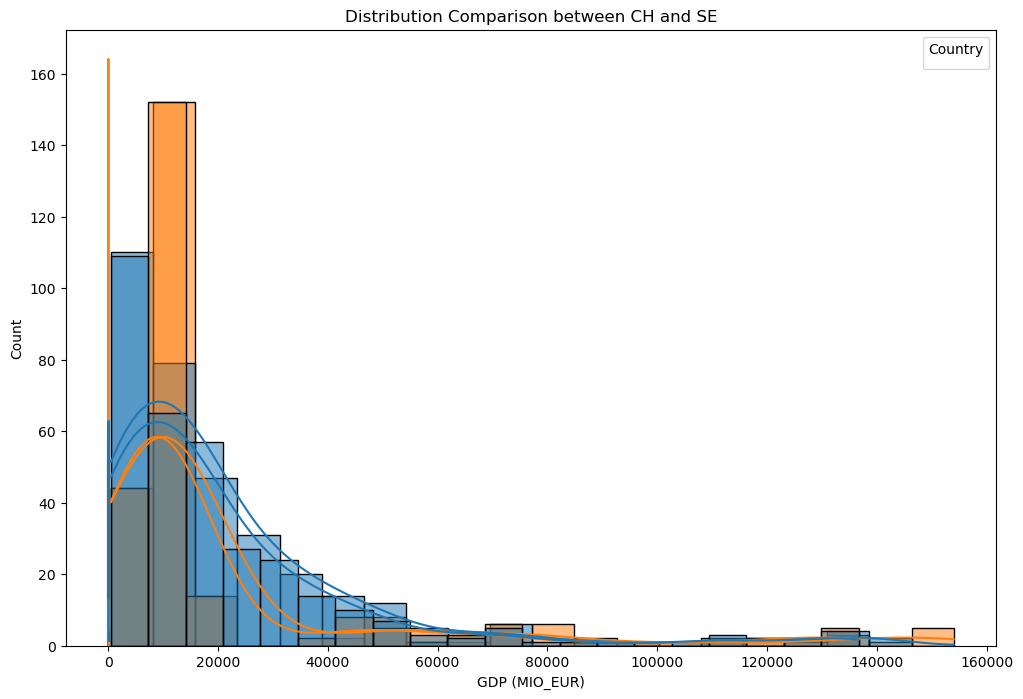

In [108]:
# Filter data for CH and SE
CH_SE = low_density_high_gdp_outliers[(low_density_high_gdp_outliers['country'] == "CH") | (low_density_high_gdp_outliers['country'] == "SE")]

# Descriptive Statistics
descriptive_stats = CH_SE[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita', 'country']].groupby('country').describe()

# Distribution Comparison
plt.figure(figsize=(12, 8))
for col in ['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita']:
    sns.histplot(data=CH_SE, x=col, hue='country', kde=True, bins=20, alpha=0.5)
plt.legend(title='Country')
plt.title('Distribution Comparison between CH and SE')
plt.show()

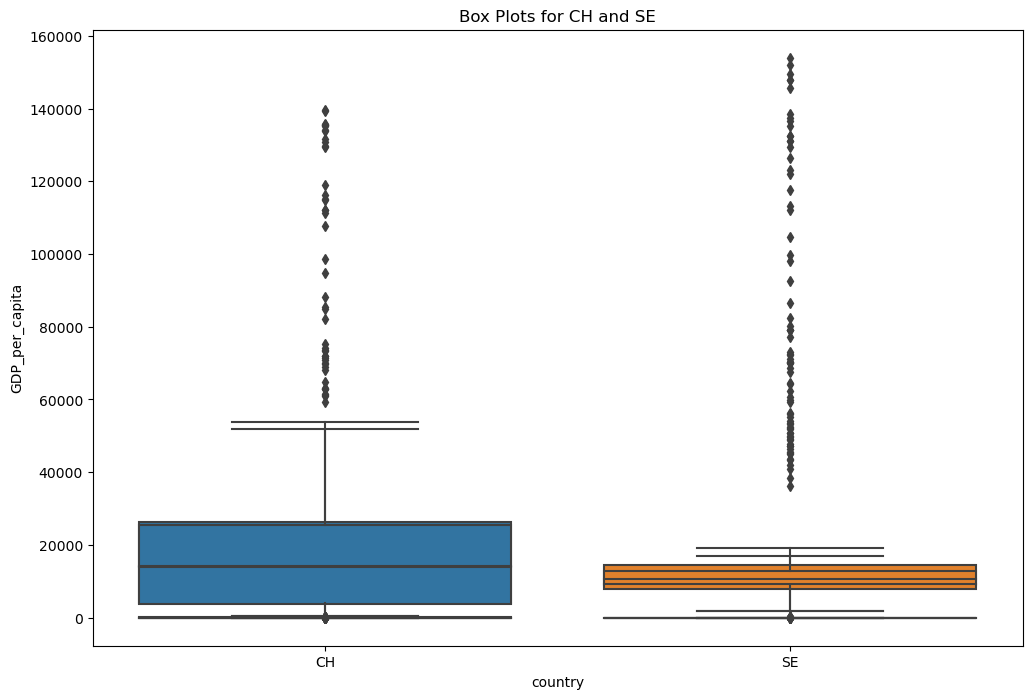

In [43]:
# Box Plots
plt.figure(figsize=(12, 8))
for col in ['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita']:
    sns.boxplot(x='country', y=col, data=CH_SE)
plt.title('Box Plots for CH and SE')
plt.show()

Both Switzerland and Sweden display a similar distribution of GDP per capita within their regions. However, it's essential to emphasize that our analysis is specifically centered on outliers. The observed distribution is skewed, and these outliers do not necessarily reflect the overall distribution across the entire population. This distinction is crucial for the accurate interpretation and generalization of findings, as outliers may not offer a comprehensive representation of the broader economic landscape within these countries.

In [44]:
descriptive_stats

GDP (MIO_EUR)                                                        \
                count          mean           std          min          25%   
country                                                                       
CH              336.0  21244.118189  25517.787291   526.542379  3961.633713   
SE              248.0  21761.371129  31455.183856  1959.450000  8944.185000   

                                                   GVA (MIO_EUR)  \
                  50%           75%            max         count   
country                                                            
CH       14310.878299  26426.057582  139562.093835         336.0   
SE       10578.285000  14553.270000  153963.040000         248.0   

                       ... Programming_Density           GDP_per_capita  \
                 mean  ...                 75%       max          count   
country                ...                                                
CH       20573.480965  ...            0.000972  0.004519          336.0   
SE       19296.510685  ...            0.001085  0.002621          248.0   

                                                                           \
              mean        std        min        25%        50%        75%   
country                                                                     
CH       64.542327  25.555366  33.885729  49.853420  58.373505  68.588036   
SE       39.815167   6.438244  32.249773  36.122448  38.201111  41.113947   

                     
                max  
country              
CH       179.474034  
SE        65.702936  

[2 rows x 32 columns]

In [45]:
without_outliers = FINAL_no_TR.drop(CH_SE.index)

descriptive_stats_1 = without_outliers[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita', 'country']].groupby('country').describe()
descriptive_stats_1

GDP (MIO_EUR)                                                       \
                count          mean           std         min          25%   
country                                                                      
CH                2.0   1094.118111     40.424716  1065.53352  1079.825816   
ES              702.0  19977.137550  33935.266448  1369.74000  5876.590000   
FR             1248.0  22148.889784  29509.277516  1648.42000  6855.422500   
IT             1391.0  15555.208447  22977.078988  1605.51000  5812.175000   
SE               25.0   7978.393200   6351.043552  1477.17000  6344.550000   

                                                   GVA (MIO_EUR)  \
                  50%           75%            max         count   
country                                                            
CH        1094.118111   1108.410407    1122.702702           2.0   
ES       11725.175000  21041.555000  242093.290000         702.0   
FR       14067.070000  23214.875000  246936.500000        1248.0   
IT        9293.330000  16364.645000  181529.430000        1391.0   
SE        7675.580000   8298.340000   35830.820000          25.0   

                       ... Programming_Density           GDP_per_capita  \
                 mean  ...                 75%       max          count   
country                ...                                                
CH        1056.852377  ...            0.000027  0.000036            2.0   
ES       18265.500142  ...            0.000298  0.006757          702.0   
FR       19812.629030  ...            0.000227  0.005525         1248.0   
IT       13989.881452  ...            0.000247  0.001103         1391.0   
SE        7041.967200  ...            0.000264  0.000609           25.0   

                                                                           \
              mean        std        min        25%        50%        75%   
country                                                                     
CH       31.112055   1.043219  30.374388  30.743221  31.112055  31.480888   
ES       22.019748   4.668596  14.567821  18.460687  20.805772  25.326713   
FR       28.205526  11.299198  18.180449  23.372313  25.697130  29.697672   
IT       25.413648   6.986212  13.930197  19.166427  25.270399  29.827728   
SE       28.881842   1.856825  24.841673  28.068090  28.828333  30.390702   

                     
                max  
country              
CH        31.849722  
ES        39.030729  
FR       115.082174  
IT        55.773842  
SE        31.588049  

[5 rows x 32 columns]

In [46]:
# Correlation Analysis
correlation_matrix_outliers = CH_SE[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita']].corr()
correlation_matrix_outliers

,GDP (MIO_EUR),GVA (MIO_EUR),Programming_Density,GDP_per_capita
GDP (MIO_EUR),1.000000,0.998497,0.589014,0.275753
GVA (MIO_EUR),0.998497,1.000000,0.595787,0.296166
Programming_Density,0.589014,0.595787,1.000000,0.539794
GDP_per_capita,0.275753,0.296166,0.539794,1.000000


In [47]:
correlation_matrix_df = without_outliers[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita']].corr()
correlation_matrix_df

,GDP (MIO_EUR),GVA (MIO_EUR),Programming_Density,GDP_per_capita
GDP (MIO_EUR),1.000000,0.999912,0.340612,0.662283
GVA (MIO_EUR),0.999912,1.000000,0.337312,0.656955
Programming_Density,0.340612,0.337312,1.000000,0.383061
GDP_per_capita,0.662283,0.656955,0.383061,1.000000


A significant portion of locations in Sweden has been identified as outliers, primarily driven by two key factors:

1. Low Population Density and Large Administrative Regions: The country exhibits a sparse population density, and the presence of a limited number of major cities results in the creation of expansive administrative regions. This geographical and demographic configuration contributes to the outlier designation.

2. High GDP Influenced by Local Economic Factors: These regions record high GDP figures, stemming from various elements of the local economy. It's essential to note that this economic prosperity may not solely be attributed to technological growth. Instead, it is often linked to the considerable size of the administrative regions being compared.

3. Higher GDP per Capita Compared to the Rest of Europe:Notably, Sweden maintains a generally elevated GDP per capita in comparison to the broader European context. This economic indicator further contributes to the outlier status of the analyzed locations.

In summary, the majority of outlier locations in Sweden are characterized by a unique interplay of low population density, expansive administrative regions, and a robust local economy. Understanding these dynamics is crucial for interpreting the outlier designation and contextualizing Sweden's economic landscape within the European region.